# Do Interictal DischargesAffect Functional Connectivity

author: Jeni Stiso (jeni.stiso@gmail.com)

words

In [151]:
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.anova import AnovaRM
import palettable

%matplotlib inline
plt.rcParams['svg.fonttype'] = 'none'
sns.set_context('poster')
sns.set_style("whitegrid")

In [152]:
# directories - point this at you RAM data
RAM_dir = '/Volumes/bassett-data/Jeni/RAM/'
win = 1
detector = '' # '_delphos' or ''

# load data
net_data = pd.read_csv(f'{RAM_dir}group_analysis/win_{win}/network_stats{detector}.csv', index_col=0)
node_data = pd.read_csv(f'{RAM_dir}group_analysis/win_{win}/node_stats{detector}.csv', index_col=0)

# drop duplicates
net_data.drop_duplicates(inplace=True)
node_data.drop_duplicates(inplace=True)

Check the data

In [119]:
net_data.head(10)

band_measure  n_tp  str_beta_bin  str_beta_num  str_soz_beta_bin  \
1         alpha_aec   103     -0.419244      0.235351         -0.310942   
2   alpha_aec_ortho   103     -0.771762      0.215350          0.126353   
3         alpha_coh   103     -0.684881      0.329843         -0.318961   
4         alpha_plv   103      0.477982     -0.363631         -0.428706   
5          beta_aec   103     -0.126780      0.051691         -0.277071   
6    beta_aec_ortho   103      0.240572     -0.093483          0.184095   
7          beta_coh   103     -1.309670      0.541208         -0.001434   
8          beta_plv   103     -2.121662      0.847195         -0.689684   
9      broadband_ar   103      0.845085     -0.266844         -2.440856   
10  broadband_xcorr   103     -0.771480      0.501514          0.487497   

    str_soz_beta_num  str_not_soz_beta_num  str_spike_beta_num  \
1           0.117977              0.238938            0.002141   
2          -0.230048              0.334085           -0.095799   
3           0.072250              0.372437            0.223743   
4          -0.131889             -0.383578            0.066414   
5           0.034470              0.007333           -0.435135   
6          -0.108367             -0.052509           -0.181834   
7          -0.006426              0.585279            0.294076   
8           0.225100              0.918503            0.480527   
9           0.869154             -0.587021            0.222291   
10         -0.128864              0.549452            0.209742   

    str_not_soz_beta_bin  str_spike_beta_bin  str_not_spike_beta_bin  \
1              -0.343517            0.109111               -0.556709   
2              -1.000588            0.096492               -0.645362   
3              -0.778733           -0.346163               -0.699280   
4               0.677668           -0.076645                0.560442   
5               0.022398            1.572055               -0.477351   
6               0.099802            0.051523               -0.008852   
7              -1.356769           -0.497773               -1.431811   
8              -2.245012           -1.282708               -2.065037   
9               1.683949           -0.678137                1.108874   
10             -0.878064           -0.797642               -0.673203   

   fc_measure  str_not_spike_beta_num       band    subj hand  age gender  \
1         aec                0.275126      alpha  R1170J    R   20      M   
2   aec_ortho                0.174600      alpha  R1170J    R   20      M   
3         coh                0.325214      alpha  R1170J    R   20      M   
4         plv               -0.429397      alpha  R1170J    R   20      M   
5         aec                0.137866       beta  R1170J    R   20      M   
6   aec_ortho                0.081093       beta  R1170J    R   20      M   
7         coh                0.593252       beta  R1170J    R   20      M   
8         plv                0.827985       beta  R1170J    R   20      M   
9          ar               -0.334009  broadband  R1170J    R   20      M   
10      xcorr                0.500939  broadband  R1170J    R   20      M   

    race  
1    2.0  
2    2.0  
3    2.0  
4    2.0  
5    2.0  
6    2.0  
7    2.0  
8    2.0  
9    2.0  
10   2.0

In [122]:
net_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3885 entries, 1 to 3885
Data columns (total 19 columns):
band_measure              3885 non-null object
n_tp                      3885 non-null int64
str_beta_bin              3696 non-null float64
str_beta_num              3696 non-null float64
str_soz_beta_bin          2625 non-null float64
str_soz_beta_num          2625 non-null float64
str_not_soz_beta_num      2613 non-null float64
str_spike_beta_num        2541 non-null float64
str_not_soz_beta_bin      2613 non-null float64
str_spike_beta_bin        2541 non-null float64
str_not_spike_beta_bin    2527 non-null float64
fc_measure                3885 non-null object
str_not_spike_beta_num    2527 non-null float64
band                      3885 non-null object
subj                      3885 non-null object
hand                      3843 non-null object
age                       3885 non-null int64
gender                    3885 non-null object
race                      3738 non-null

In [123]:
net_data.describe()

n_tp  str_beta_bin  str_beta_num  str_soz_beta_bin  \
count  3885.000000   3696.000000   3696.000000       2625.000000   
mean    936.967568     -0.276924      0.085879         -0.199567   
std    1084.210019      1.414389      0.438778          1.321922   
min       5.000000    -12.226924     -4.169335        -16.621020   
25%     167.000000     -0.563755     -0.064732         -0.454041   
50%     592.000000     -0.170663      0.025196         -0.089733   
75%    1164.000000      0.098183      0.197673          0.096695   
max    5685.000000     18.197432      4.293593         12.623180   

       str_soz_beta_num  str_not_soz_beta_num  str_spike_beta_num  \
count       2625.000000           2613.000000         2541.000000   
mean           0.081369              0.072965            0.079839   
std            0.479529              0.453662            0.498191   
min           -4.650909             -3.912592           -5.911721   
25%           -0.044303             -0.065323           -0.042132   
50%            0.016220              0.019988            0.023593   
75%            0.177945              0.178112            0.197342   
max            5.395048              3.999461            5.378249   

       str_not_soz_beta_bin  str_spike_beta_bin  str_not_spike_beta_bin  \
count           2613.000000         2541.000000             2527.000000   
mean              -0.237267           -0.198377               -0.215224   
std                1.286207            1.361532                1.311666   
min              -11.778761          -16.578939              -14.253089   
25%               -0.521945           -0.478637               -0.504850   
50%               -0.150911           -0.116078               -0.128695   
75%                0.093110            0.106695                0.144010   
max               11.505223           14.619944               11.164508   

       str_not_spike_beta_num          age         race  
count             2527.000000  3885.000000  3738.000000  
mean                 0.066349    36.118919     2.915730  
std                  0.461725    11.591652     1.231169  
min                 -3.809406    16.000000     1.000000  
25%                 -0.072591    26.000000     2.000000  
50%                  0.015370    36.000000     4.000000  
75%                  0.172054    44.000000     4.000000  
max                  4.115777    66.000000     7.000000

In [124]:
node_data.tail(10)

elec     band_measure  n_tp  elec_spike  elec_in_soz  \
389688  RPT4  gamma_aec_ortho  5685    0.001407            1   
389689  RPT4        gamma_coh  5685    0.001407            1   
389690  RPT4        gamma_plv  5685    0.001407            1   
389691  RPT4           hg_aec  5685    0.001407            1   
389692  RPT4     hg_aec_ortho  5685    0.001407            1   
389693  RPT4           hg_coh  5685    0.001407            1   
389694  RPT4        theta_aec  5685    0.001407            1   
389695  RPT4  theta_aec_ortho  5685    0.001407            1   
389696  RPT4        theta_coh  5685    0.001407            1   
389697  RPT4        theta_plv  5685    0.001407            1   

        str_soz_beta_bin  str_not_soz_beta_bin  str_spike_beta_bin  \
389688         -0.000551                   NaN           -0.000055   
389689          0.159380                   NaN           -0.024696   
389690          0.232054                   NaN            0.345726   
389691          0.109441                   NaN            0.271254   
389692         -0.000125                   NaN           -0.000063   
389693          0.059388                   NaN            0.179303   
389694          0.024053                   NaN           -0.056363   
389695          0.043566                   NaN            0.000154   
389696         -0.041703                   NaN           -0.135138   
389697          0.060231                   NaN           -0.008040   

        str_not_spike_beta_bin  str_beta_bin  ...        region        x  \
389688               -0.000439     -0.000551  ...   postcentral  44.7886   
389689                0.150670      0.159380  ...   postcentral  44.7886   
389690                0.184587      0.232054  ...   postcentral  44.7886   
389691                0.030480      0.109441  ...   postcentral  44.7886   
389692               -0.000054     -0.000125  ...   postcentral  44.7886   
389693                0.054222      0.059388  ...   postcentral  44.7886   
389694                0.038211      0.024053  ...   postcentral  44.7886   
389695                0.028100      0.043566  ...   postcentral  44.7886   
389696               -0.009124     -0.041703  ...   postcentral  44.7886   
389697                0.052531      0.060231  ...   postcentral  44.7886   

              y          z  type    subj hand age  gender  race  
389688 -32.1611  67.016101     S  R1001P    R  48       F   1.0  
389689 -32.1611  67.016101     S  R1001P    R  48       F   1.0  
389690 -32.1611  67.016101     S  R1001P    R  48       F   1.0  
389691 -32.1611  67.016101     S  R1001P    R  48       F   1.0  
389692 -32.1611  67.016101     S  R1001P    R  48       F   1.0  
389693 -32.1611  67.016101     S  R1001P    R  48       F   1.0  
389694 -32.1611  67.016101     S  R1001P    R  48       F   1.0  
389695 -32.1611  67.016101     S  R1001P    R  48       F   1.0  
389696 -32.1611  67.016101     S  R1001P    R  48       F   1.0  
389697 -32.1611  67.016101     S  R1001P    R  48       F   1.0  

[10 rows x 27 columns]

In [125]:
node_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389697 entries, 1 to 389697
Data columns (total 27 columns):
elec                      389697 non-null object
band_measure              389697 non-null object
n_tp                      389697 non-null int64
elec_spike                389697 non-null float64
elec_in_soz               389697 non-null int64
str_soz_beta_bin          257061 non-null float64
str_not_soz_beta_bin      236583 non-null float64
str_spike_beta_bin        246918 non-null float64
str_not_spike_beta_bin    216849 non-null float64
str_beta_bin              371553 non-null float64
str_soz_beta_num          257061 non-null float64
str_not_soz_beta_num      236583 non-null float64
str_spike_beta_num        246918 non-null float64
str_beta_num              371553 non-null float64
str_not_spike_beta_num    216849 non-null float64
fc_measure                389697 non-null object
band                      389697 non-null object
region                    350973 non-null objec

In [126]:
node_data.describe()

n_tp     elec_spike    elec_in_soz  str_soz_beta_bin  \
count  389697.000000  389697.000000  389697.000000     257061.000000   
mean      860.231672       0.020325       0.056421         -0.044105   
std      1020.403746       0.046846       0.230733          4.102153   
min         5.000000       0.000000       0.000000       -109.981986   
25%       147.000000       0.000000       0.000000         -0.274347   
50%       525.000000       0.002793       0.000000         -0.000871   
75%      1109.000000       0.016854       0.000000          0.137285   
max      5685.000000       0.603161       1.000000        981.791821   

       str_not_soz_beta_bin  str_spike_beta_bin  str_not_spike_beta_bin  \
count         236583.000000       246918.000000           216849.000000   
mean              -0.125969           -0.056338               -0.097024   
std                5.302570            4.061381                5.892530   
min            -1585.030817         -793.926653            -1871.473510   
25%               -0.346576           -0.313820               -0.340729   
50%               -0.015167           -0.001706               -0.012823   
75%                0.126982            0.147605                0.139639   
max             1261.878329          845.411915             1138.166394   

        str_beta_bin  str_soz_beta_num  str_not_soz_beta_num  \
count  371553.000000     257061.000000         236583.000000   
mean       -0.145690          0.032929              0.057122   
std         4.285513          0.592714              0.707025   
min     -1372.322447       -104.573686           -134.586377   
25%        -0.380244         -0.040663             -0.039962   
50%        -0.023528          0.000277              0.005171   
75%         0.125553          0.105694              0.134586   
max      1277.304636          9.928204            168.684465   

       str_spike_beta_num   str_beta_num  str_not_spike_beta_num  \
count       246918.000000  371553.000000           216849.000000   
mean             0.038221       0.068127                0.048526   
std              0.747284       0.719771                0.829305   
min            -90.097274    -136.235714             -121.429609   
25%             -0.041690      -0.037099               -0.045259   
50%              0.000630       0.008783                0.003575   
75%              0.121726       0.149535                0.133778   
max             84.617025     146.047420              199.167697   

                   x              y              z            age  \
count  306033.000000  306033.000000  306033.000000  389697.000000   
mean       -6.414178      -7.972797       2.711542      36.184351   
std        45.254138      33.746689      45.925074      11.682381   
min      -162.660000    -143.909000    -402.070855      16.000000   
25%       -45.206400     -30.254200     -20.004853      26.000000   
50%       -17.406200      -7.990910      -0.253974      36.000000   
75%        34.272300      15.141600      30.531287      45.000000   
max       173.816000      73.317000      93.980799      66.000000   

                race  
count  377580.000000  
mean        2.897775  
std         1.237803  
min         1.000000  
25%         2.000000  
50%         4.000000  
75%         4.000000  
max         7.000000

Basic EDA: check distribution of demographics, replace NaNs where appropriate, etc

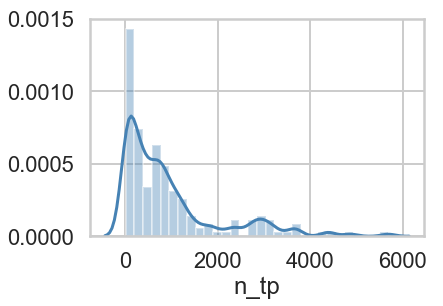

In [127]:
sns.distplot(net_data['n_tp'], bins=30, color='steelblue')

In [129]:
net_data.subj.nunique()

183

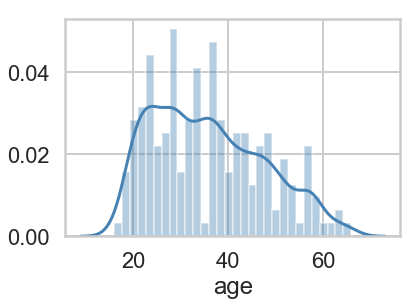

In [153]:
net_data['age'].replace(to_replace=0, value=None, inplace=True)
sns.distplot(net_data['age'].dropna(), bins=30, color='steelblue')
mean_age = net_data['age'].mean()

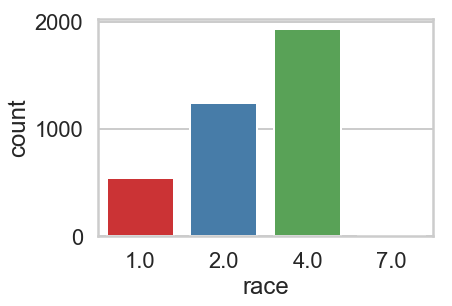

In [131]:
sns.countplot(data=net_data, x='race', )
mean_race = 4

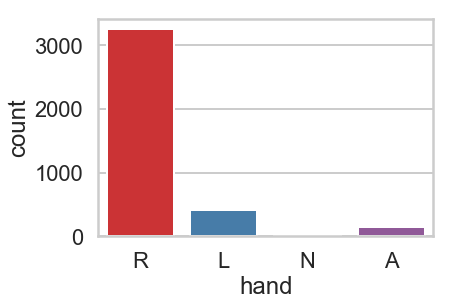

In [132]:
sns.countplot(data=net_data, x='hand', )
mean_hand = 'R'

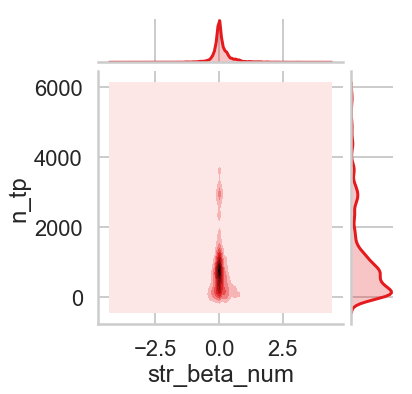

In [133]:
sns.jointplot(data=net_data, x='str_beta_num', y='n_tp', kind='kde' )

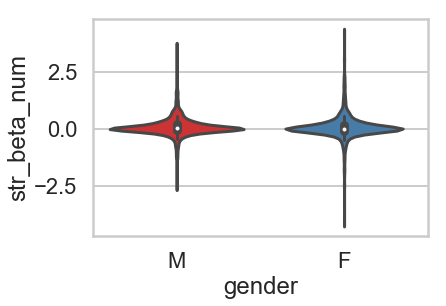

In [134]:
sns.violinplot(data=net_data, x='gender', y='str_beta_num', cut=True)

In [154]:
# add means for null values
net_data.loc[net_data['age'].isnull(), 'age'] = mean_age
net_data.loc[net_data['race'].isnull(), 'race'] = mean_race
net_data.loc[net_data['hand'].isnull(), 'hand'] = mean_hand

# same for node data
node_data.loc[node_data['age'].isnull(), 'age'] = mean_age
node_data.loc[node_data['race'].isnull(), 'race'] = mean_race
node_data.loc[node_data['hand'].isnull(), 'hand'] = mean_hand

In [136]:
# check for duplicates, these two numbers should match
print(net_data.dropna().subj.nunique())
print(net_data[net_data.band_measure == 'theta_plv'].dropna().subj.count())

108
108


In [137]:
node_data.dropna(axis=0).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134495 entries, 1 to 389686
Data columns (total 27 columns):
elec                      134495 non-null object
band_measure              134495 non-null object
n_tp                      134495 non-null int64
elec_spike                134495 non-null float64
elec_in_soz               134495 non-null int64
str_soz_beta_bin          134495 non-null float64
str_not_soz_beta_bin      134495 non-null float64
str_spike_beta_bin        134495 non-null float64
str_not_spike_beta_bin    134495 non-null float64
str_beta_bin              134495 non-null float64
str_soz_beta_num          134495 non-null float64
str_not_soz_beta_num      134495 non-null float64
str_spike_beta_num        134495 non-null float64
str_beta_num              134495 non-null float64
str_not_spike_beta_num    134495 non-null float64
fc_measure                134495 non-null object
band                      134495 non-null object
region                    134495 non-null objec

In [138]:
# save
net_data.to_csv(f'{RAM_dir}group_analysis/win_{win}/net_data_clean{detector}.csv')

## Effects on Network Measures

visualize how much spikes regularly change network strength.

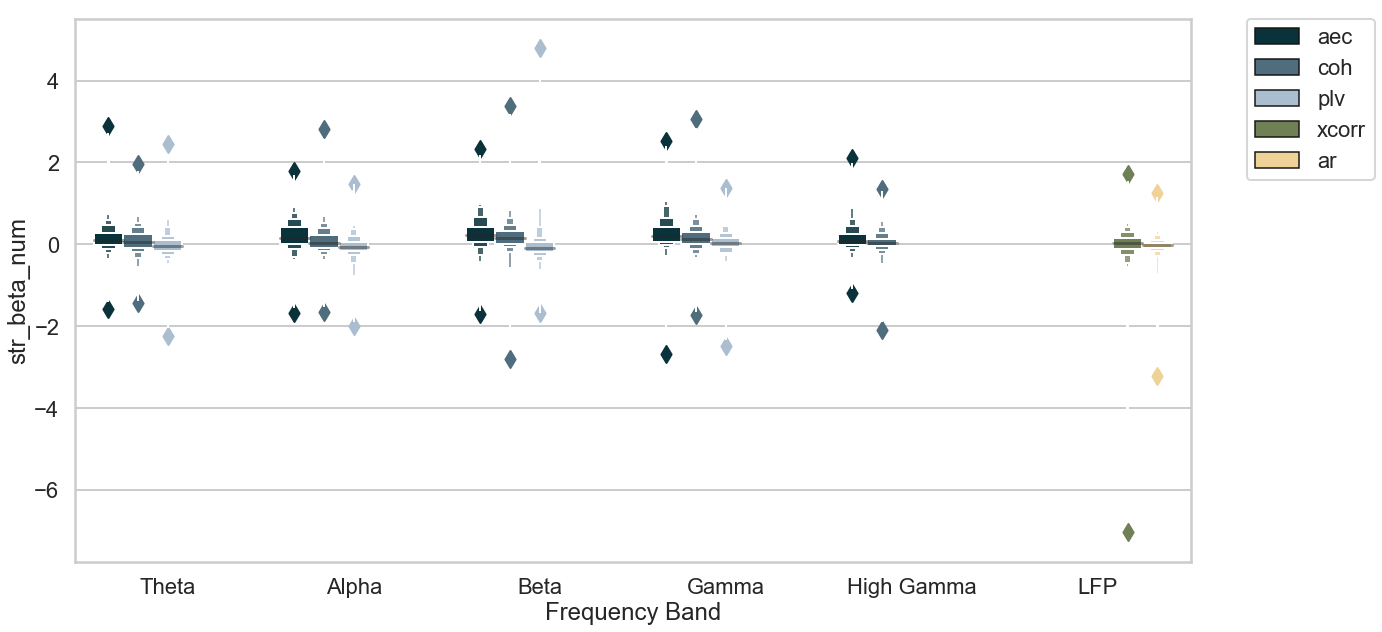

In [167]:


# rename stuff so it looks prettier - do the rest in illustrator
net_data.replace({'band':{'theta':'Theta', 'alpha':'Alpha', 'beta':'Beta', 'gamma':'Gamma', 
                              'hg':'High Gamma', 'broadband':'LFP'}}, inplace=True)
net_data.rename(columns={'band':'Frequency Band', 'fc_measure':'Measure'}, inplace=True)

# parameters
supp_flag = False # if true, includes orthogonal AEC
y_var = 'num'

if (not supp_flag):
    h_order = ['aec', 'coh', 'plv', 'xcorr', 'ar']
    supp_ext = ''
    # colors
    colors = ['#023743', '#476f84', '#A4BED5', '#72874E', '#FED789']
    custom_palette = sns.set_palette(sns.color_palette(colors))
else:
    h_order = ['aec_ortho', 'aec', 'coh', 'plv', 'xcorr', 'ar']
    supp_ext = '_supp'
    # color pallette
    colors = ['#453947', '#023743',  '#476F84', '#A4BED5', '#72874E', '#FED789']
    custom_palette = sns.set_palette(sns.color_palette(colors))
    
plt.figure(figsize=(20,10))
sns.boxenplot( data=net_data, x="Frequency Band", y='str_beta_' + y_var, hue='Measure', 
            order=['Theta','Alpha','Beta','Gamma','High Gamma','LFP'], hue_order=h_order)
#sns.stripplot( data=net_data, x="band", y='str_beta_bin',hue='fc_measure',color='black',jitter=True, dodge=True,
#            alpha=.2, zorder=1, size=6, order=['theta','alpha','beta','gamma','hg','broadband'])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#plt.ylim(-2,2)
plt.savefig(f"../img/net_{y_var}_str{detector}{supp_ext}.eps")


Is it different within or outside of the SOZ?

/Users/stiso/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the boxenplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


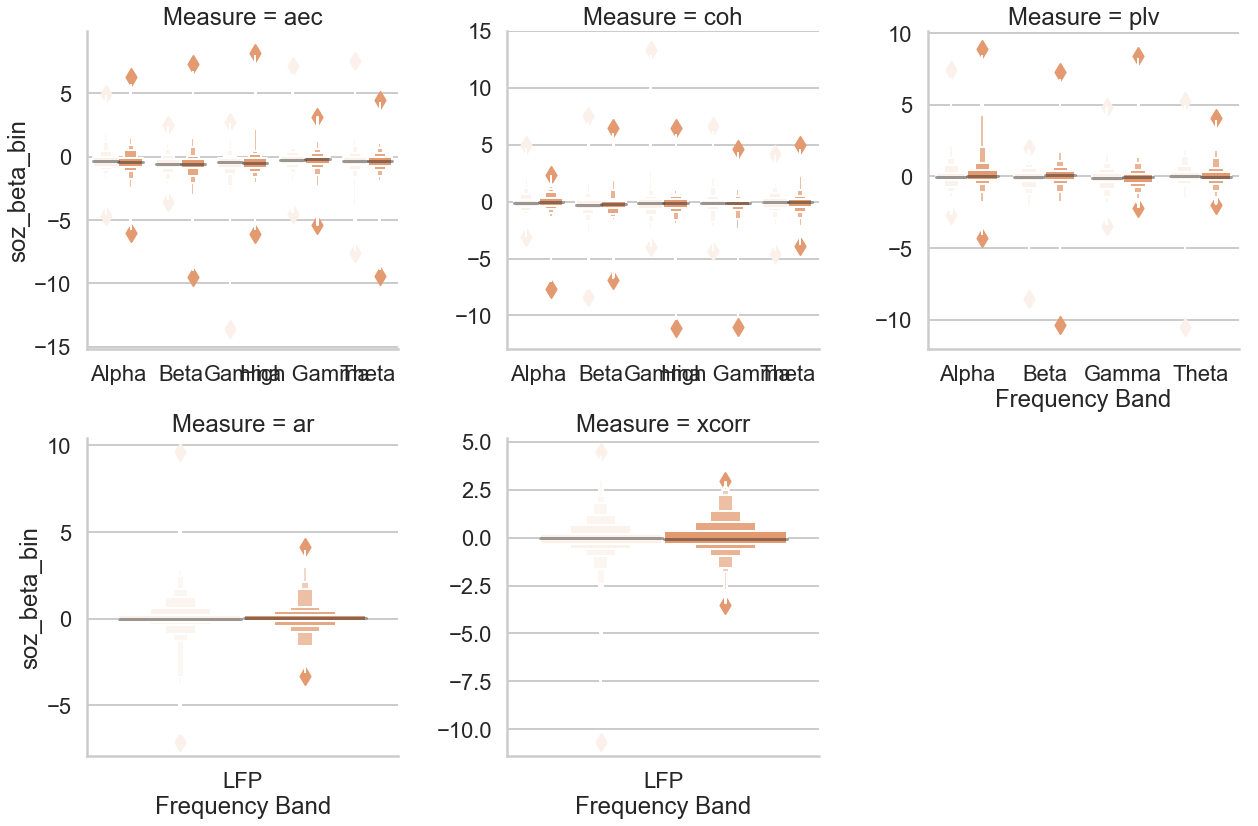

In [175]:
# reshape data
soz_net_data_bin = pd.melt(net_data, id_vars =['Frequency Band', 'Measure', 'subj', 'hand','race','gender','age'], 
                           value_vars =['str_soz_beta_bin','str_not_soz_beta_bin'],  
                           var_name ='SOZ', value_name ='soz_beta_bin')  
soz_net_data_bin = soz_net_data_bin[soz_net_data_bin['Measure'] != 'aec_ortho']

#color pallette
colors = ['#F6955E', '#A98F8E']
custom_palette = sns.set_palette(sns.color_palette(colors))
    
g = sns.FacetGrid(data=soz_net_data_bin, col='Measure' ,col_wrap = 3, 
                  sharex=False, sharey=False, legend_out=True, height=6)
g.map(sns.boxenplot, 'Frequency Band', 'soz_beta_bin', 'SOZ', palette = custom_palette, 
      hue_order=['str_soz_beta_bin','str_not_soz_beta_bin'])
#g.map(sns.stripplot, 'fc_measure', 'soz_beta_bin', 'SOZ',jitter=True, dodge=True,
#              alpha=.2, zorder=1, size=6, hue_order=['str_soz_beta_bin','str_not_soz_beta_bin'])
# g.axes[0].set_xticklabels(g.axes[0].xaxis.get_majorticklabels(),rotation=30)
# g.axes[1].set_xticklabels(g.axes[1].xaxis.get_majorticklabels(),rotation=30)
# g.axes[2].set_xticklabels(g.axes[2].xaxis.get_majorticklabels(),rotation=30)
#g.axes[5].legend(bbox_to_anchor = (1.05,1), loc=2, borderaxespad=0.)
#for ax in g.axes:
#    ax.set_ylim(-2,2)
    
g.savefig(f"../img/net_soz_bin{detector}.eps")

/Users/stiso/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the boxenplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


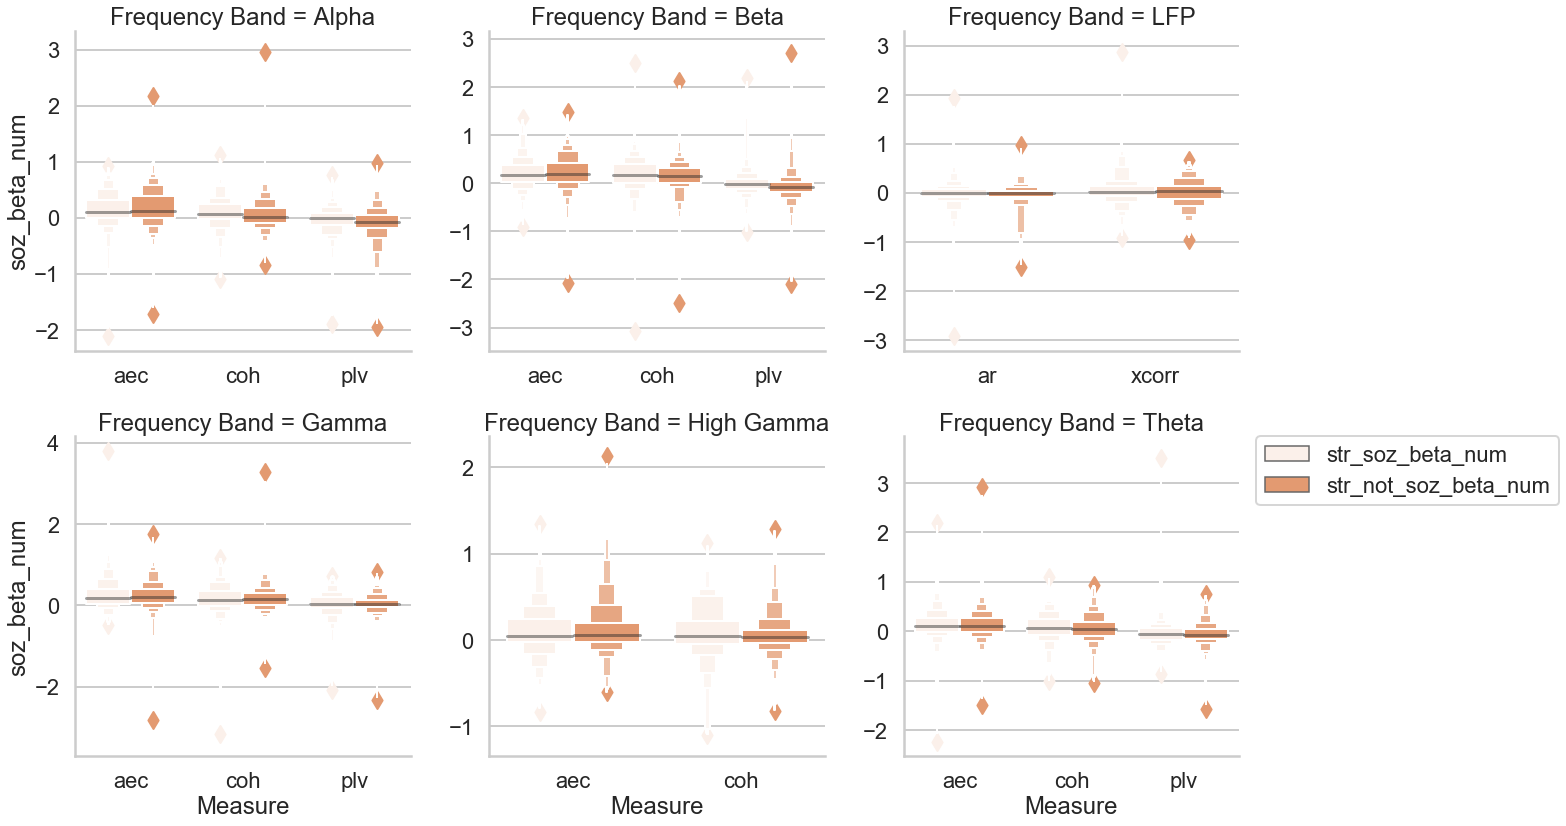

In [162]:
# reshape data
soz_net_data_num = pd.melt(net_data, id_vars =['Frequency Band', 'Measure', 'subj', 'hand','race','gender','age'], value_vars =['str_soz_beta_num','str_not_soz_beta_num'],  var_name ='SOZ', value_name ='soz_beta_num')  
soz_net_data_num = soz_net_data_num[soz_net_data_num['Measure'] != 'aec_ortho']

    
g = sns.FacetGrid(data=soz_net_data_num, col='Frequency Band' ,col_wrap = 3, 
                  sharex=False, sharey=False, legend_out=True, height=6)
g.map(sns.boxenplot, 'Measure', 'soz_beta_num', 'SOZ', palette = custom_palette, hue_order=['str_soz_beta_num','str_not_soz_beta_num'])
#g.map(sns.stripplot, 'fc_measure', 'soz_beta_num', 'SOZ',jitter=True, dodge=True,
#              alpha=.2, zorder=1, size=6, hue_order=['str_soz_beta_num','str_not_soz_beta_num'])
# g.axes[0].set_xticklabels(g.axes[0].xaxis.get_majorticklabels(),rotation=30)
# g.axes[1].set_xticklabels(g.axes[1].xaxis.get_majorticklabels(),rotation=30)
# g.axes[2].set_xticklabels(g.axes[2].xaxis.get_majorticklabels(),rotation=30)
g.axes[5].legend(bbox_to_anchor = (1.05,1), loc=2, borderaxespad=0.)
#for ax in g.axes:
#    ax.set_ylim(-2,2)
    
g.savefig(f"../img/net_soz_num{detector}.eps")

In [146]:
# save
# reformat before merge
soz_net_data_bin['SOZ'].replace('str_soz_beta_bin','within', inplace=True)
soz_net_data_bin['SOZ'].replace('str_not_soz_beta_bin','outside', inplace=True)
soz_net_data_num['SOZ'].replace('str_soz_beta_num','within', inplace=True)
soz_net_data_num['SOZ'].replace('str_not_soz_beta_num','outside', inplace=True)
soz_net_data = pd.merge(soz_net_data_bin, soz_net_data_num, on=['Frequency Band', 'Measure', 'subj', 'SOZ', 'hand','race','gender','age'])
soz_net_data.to_csv(f'{RAM_dir}group_analysis/win_{win}/net_soz_data_clean{detector}.csv')

Repeat for spikes

/Users/stiso/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the boxenplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


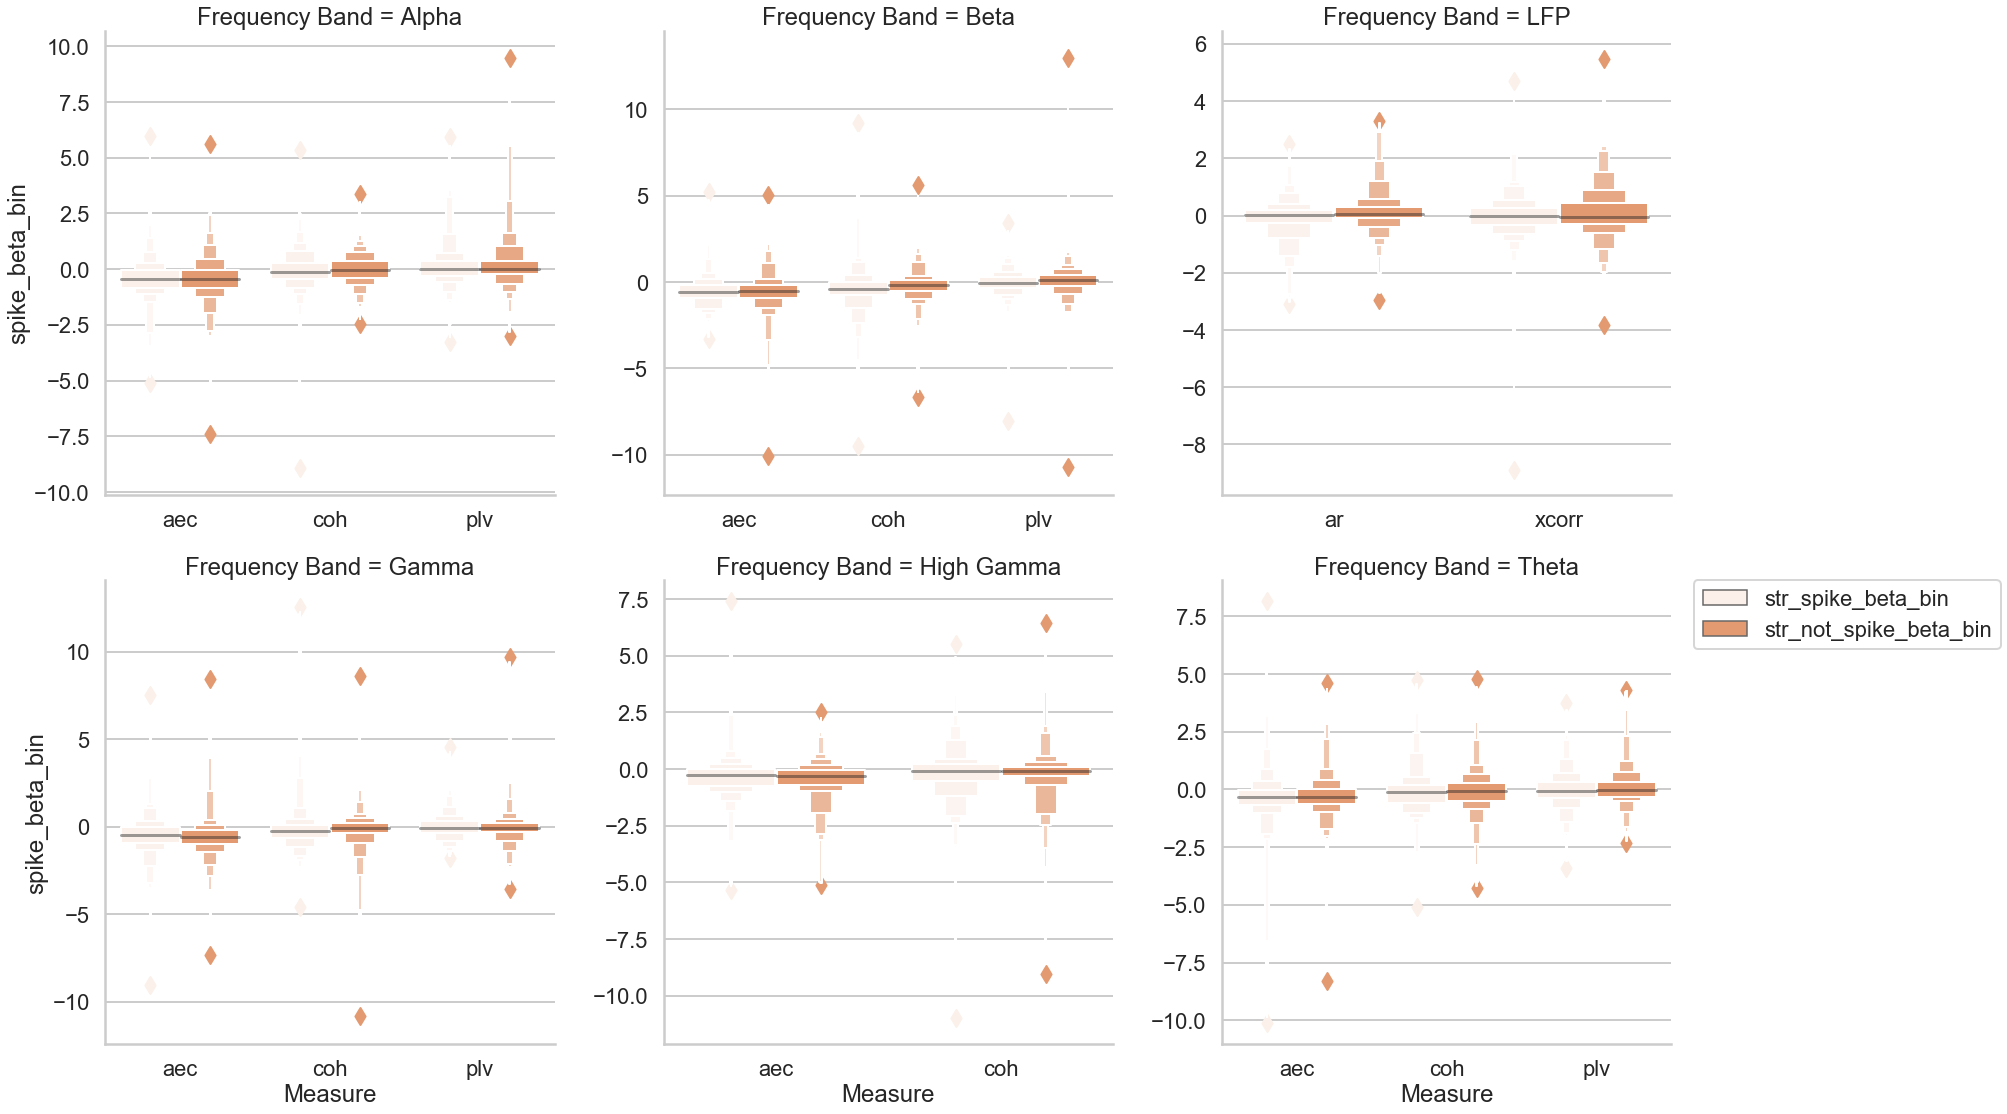

In [176]:
# reshape data
spike_net_data_bin = pd.melt(net_data, id_vars =['Frequency Band', 'Measure', 'subj', 'hand','race','gender','age'], 
                             value_vars =['str_spike_beta_bin','str_not_spike_beta_bin'],  
                             var_name ='spike', value_name ='spike_beta_bin')  
spike_net_data_bin = spike_net_data_bin[spike_net_data_bin['Measure'] != 'aec_ortho']

    
g = sns.FacetGrid(data=spike_net_data_bin, col='Frequency Band' ,col_wrap = 3, 
                  sharex=False, sharey=False, legend_out=True, height=8)
g.map(sns.boxenplot, 'Measure', 'spike_beta_bin', 'spike', palette = custom_palette, hue_order=['str_spike_beta_bin','str_not_spike_beta_bin'])
#g.map(sns.stripplot, 'fc_measure', 'spike_beta_bin', 'spike',jitter=True, dodge=True,
#              alpha=.2, zorder=1, size=6, hue_order=['str_spike_beta_bin','str_not_spike_beta_bin'])
# g.axes[0].set_xticklabels(g.axes[0].xaxis.get_majorticklabels(),rotation=30)
# g.axes[1].set_xticklabels(g.axes[1].xaxis.get_majorticklabels(),rotation=30)
# g.axes[2].set_xticklabels(g.axes[2].xaxis.get_majorticklabels(),rotation=30)
g.axes[5].legend(bbox_to_anchor = (1.05,1), loc=2, borderaxespad=0.)
#for ax in g.axes:
#    ax.set_ylim(-2,2)
#    plt.setp(ax.lines, color=".9")
    
g.savefig(f"../img/net_spike_bin{detector}.eps")

/Users/stiso/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the boxenplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


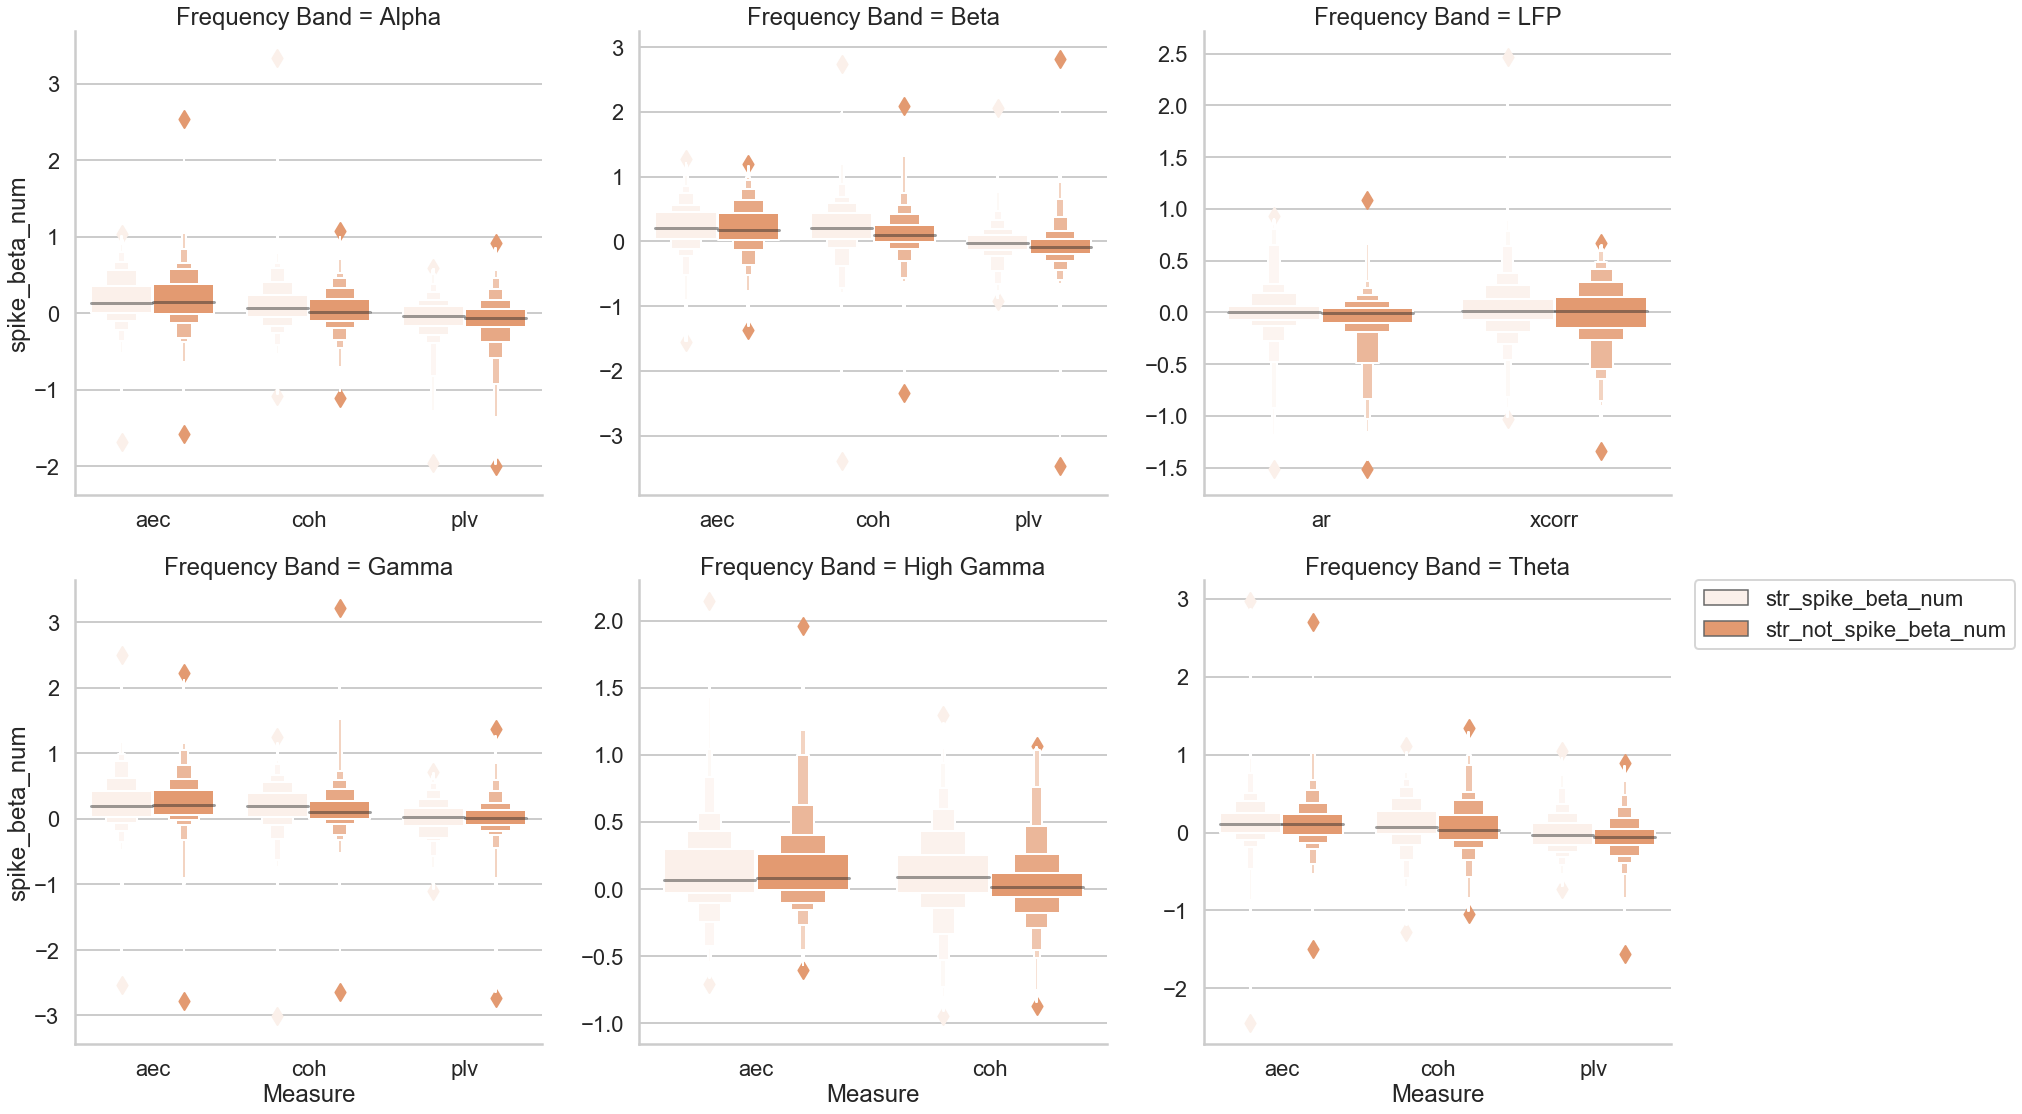

In [177]:
# reshape data
spike_net_data_num = pd.melt(net_data, id_vars =['Frequency Band', 'Measure', 'subj', 'hand','race','gender','age'], 
                             value_vars =['str_spike_beta_num','str_not_spike_beta_num'],  
                             var_name ='spike', value_name ='spike_beta_num')  
spike_net_data_num = spike_net_data_num[spike_net_data_num['Measure'] != 'aec_ortho']
    
g = sns.FacetGrid(data=spike_net_data_num, col='Frequency Band' ,col_wrap = 3, 
                  sharex=False, sharey=False, legend_out=True, height=8)
g.map(sns.boxenplot, 'Measure', 'spike_beta_num', 'spike', palette = custom_palette, hue_order=['str_spike_beta_num','str_not_spike_beta_num'])
#g.map(sns.stripplot, 'fc_measure', 'spike_beta_num', 'spike',jitter=True, dodge=True,
#              alpha=.2, zorder=1, size=6, hue_order=['str_spike_beta_num','str_not_spike_beta_num'])
# g.axes[0].set_xticklabels(g.axes[0].xaxis.get_majorticklabels(),rotation=30)
# g.axes[1].set_xticklabels(g.axes[1].xaxis.get_majorticklabels(),rotation=30)
# g.axes[2].set_xticklabels(g.axes[2].xaxis.get_majorticklabels(),rotation=30)
g.axes[5].legend(bbox_to_anchor = (1.05,1), loc=2, borderaxespad=0.)
#for ax in g.axes:
#    ax.set_ylim(-2,2)
    
g.savefig(f"../img/net_spike_num{detector}.eps")

In [178]:
# save
# reformat before merge
spike_net_data_bin['spike'].replace('str_spike_beta_bin','within', inplace=True)
spike_net_data_bin['spike'].replace('str_not_spike_beta_bin','outside', inplace=True)
spike_net_data_num['spike'].replace('str_spike_beta_num','within', inplace=True)
spike_net_data_num['spike'].replace('str_not_spike_beta_num','outside', inplace=True)
spike_net_data = pd.merge(spike_net_data_bin, spike_net_data_num, on=['Frequency Band', 'Measure', 'subj', 'spike', 'hand','race','gender','age'])
spike_net_data.to_csv(f'{RAM_dir}group_analysis/win_{win}/net_spike_data_clean{detector}.csv')

## Effects on Node Measures

relationship between the number of spikes seen in that node, and the beta value

/Users/stiso/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  This is separate from the ipykernel package so we can avoid doing imports until


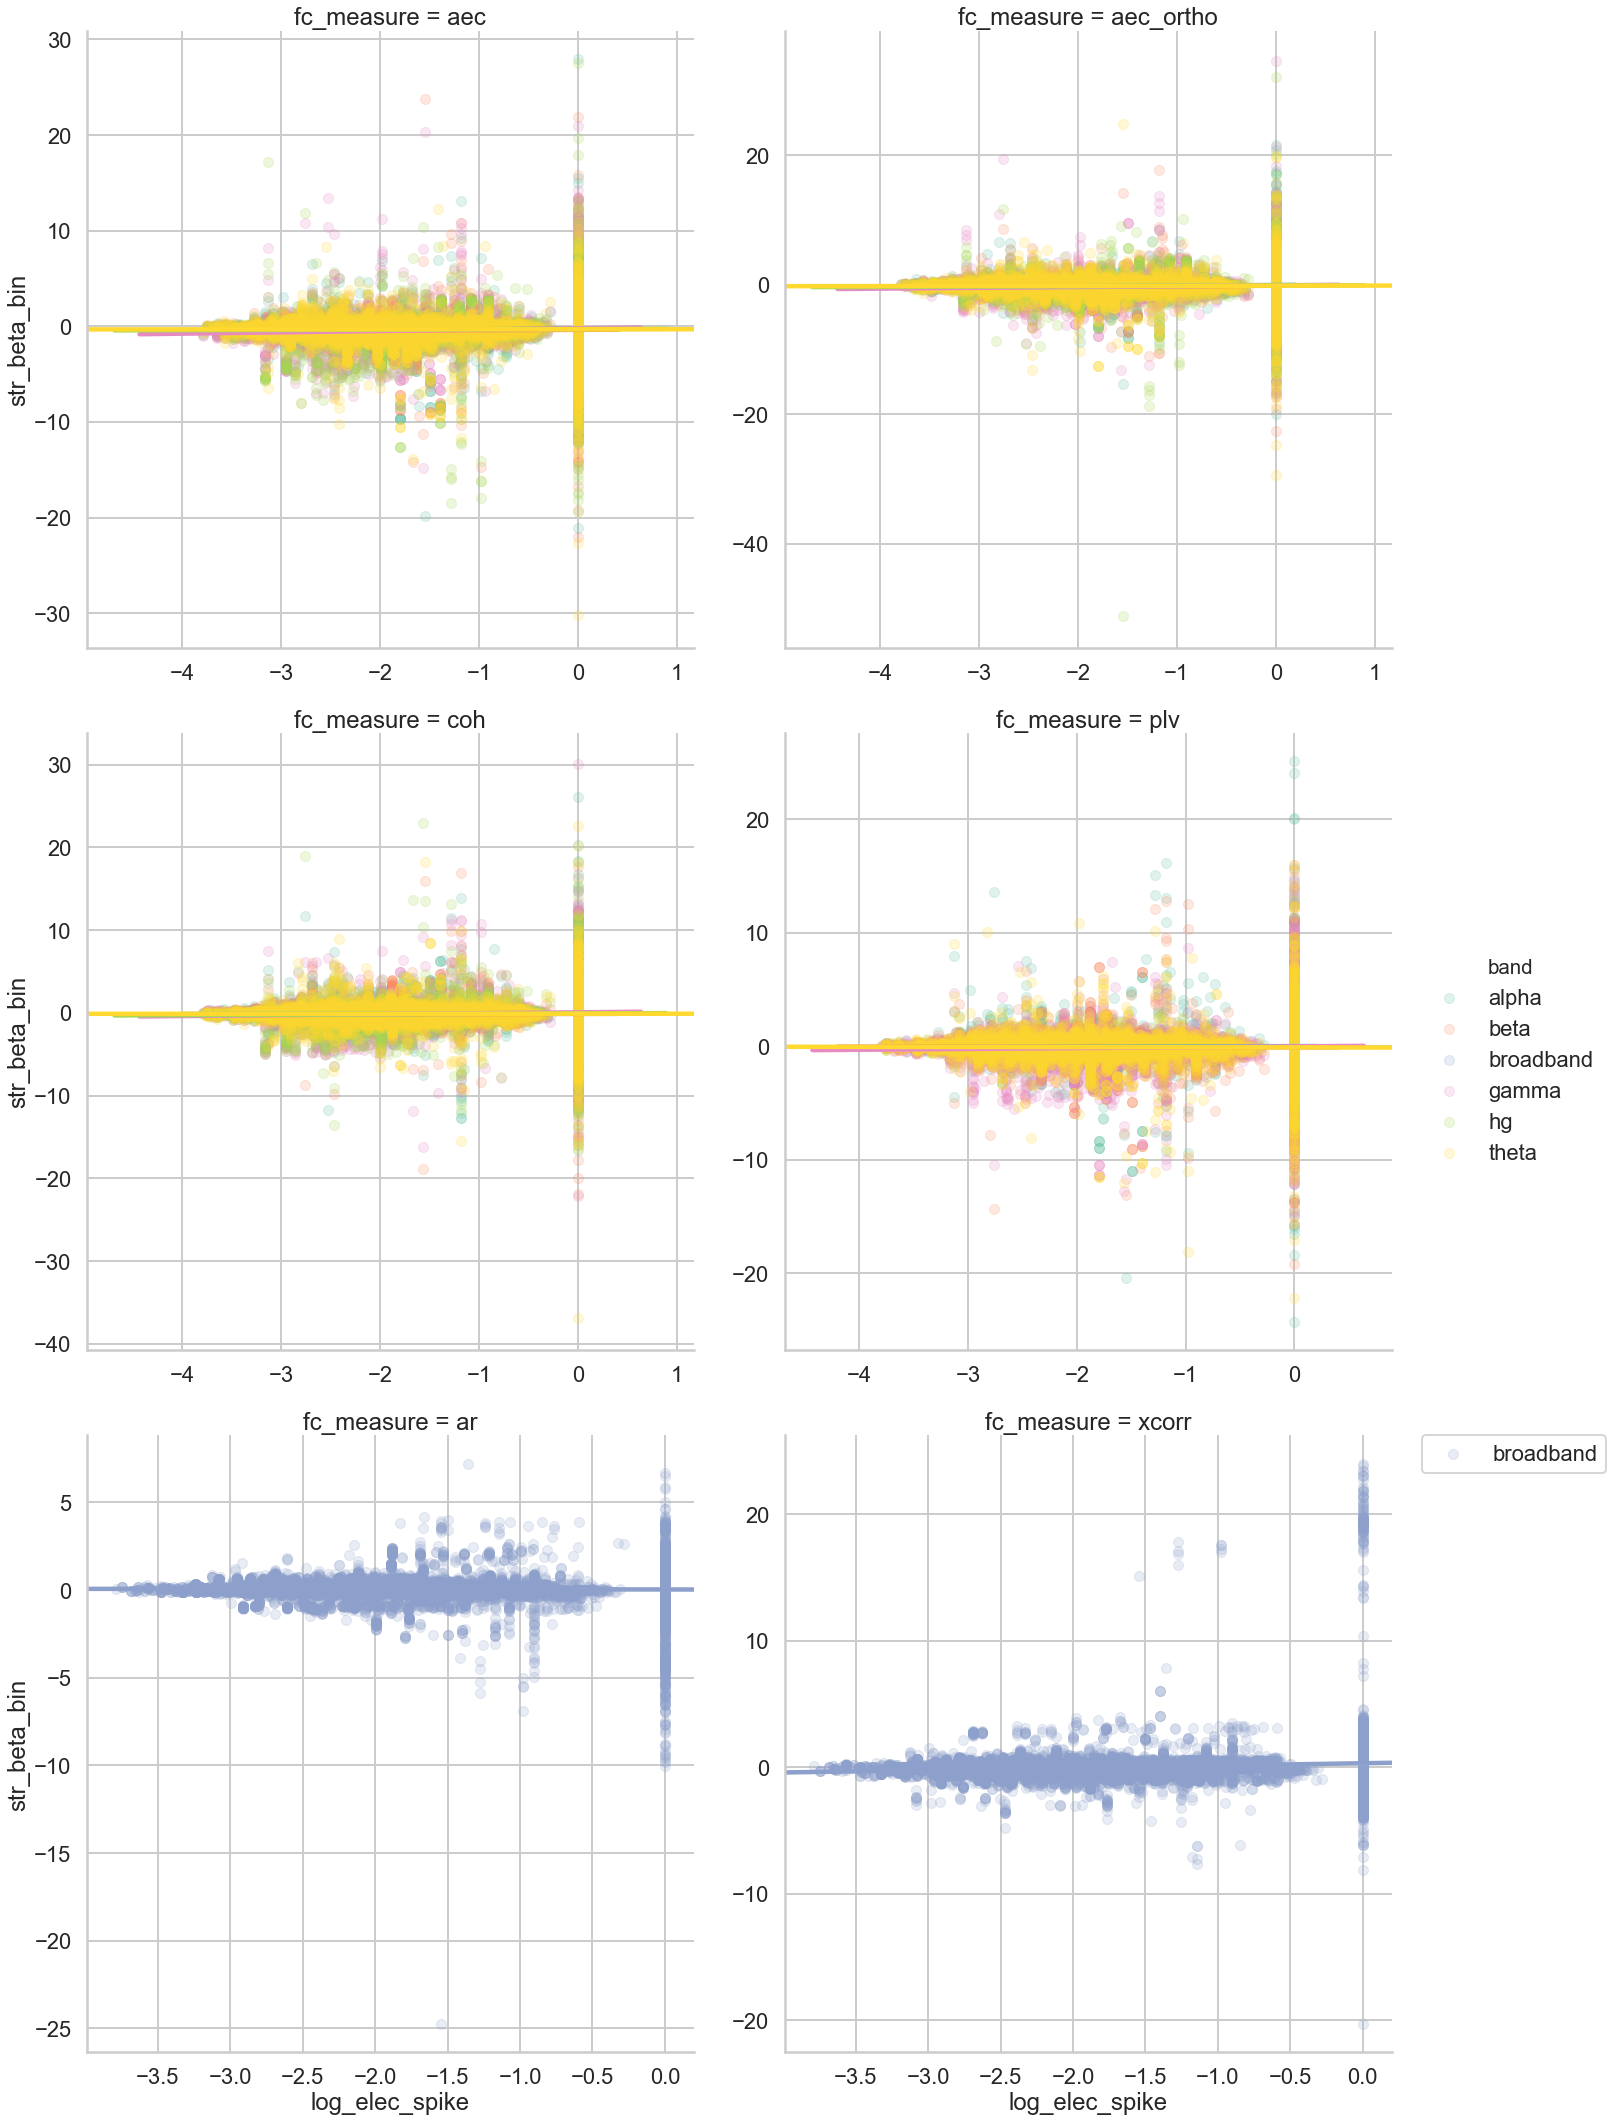

In [31]:
# add log transform
log_spike = np.zeros(np.shape(node_data['elec_spike']))
log_spike[[node_data['elec_spike'] != 0]] = np.log10(node_data['elec_spike'][node_data['elec_spike'] != 0])
node_data['log_elec_spike'] = log_spike

#color pallette
colors = ['#5b6c88', '#f0eee2']
custom_palette = sns.set_palette('Set2')

#plt.figure(figsize=(40,20))
sns.lmplot(data=node_data, x='log_elec_spike', y='str_beta_bin', hue='band', col="fc_measure", 
           col_wrap=2, height=10, sharex=False, sharey=False, scatter_kws={'s':100, 'alpha':.2})

plt.legend(bbox_to_anchor = (1.05,1), loc=2, borderaxespad=0.)
#for ax in g.axes:
#    ax.set_ylim(-2,2)
    

/Users/stiso/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  This is separate from the ipykernel package so we can avoid doing imports until


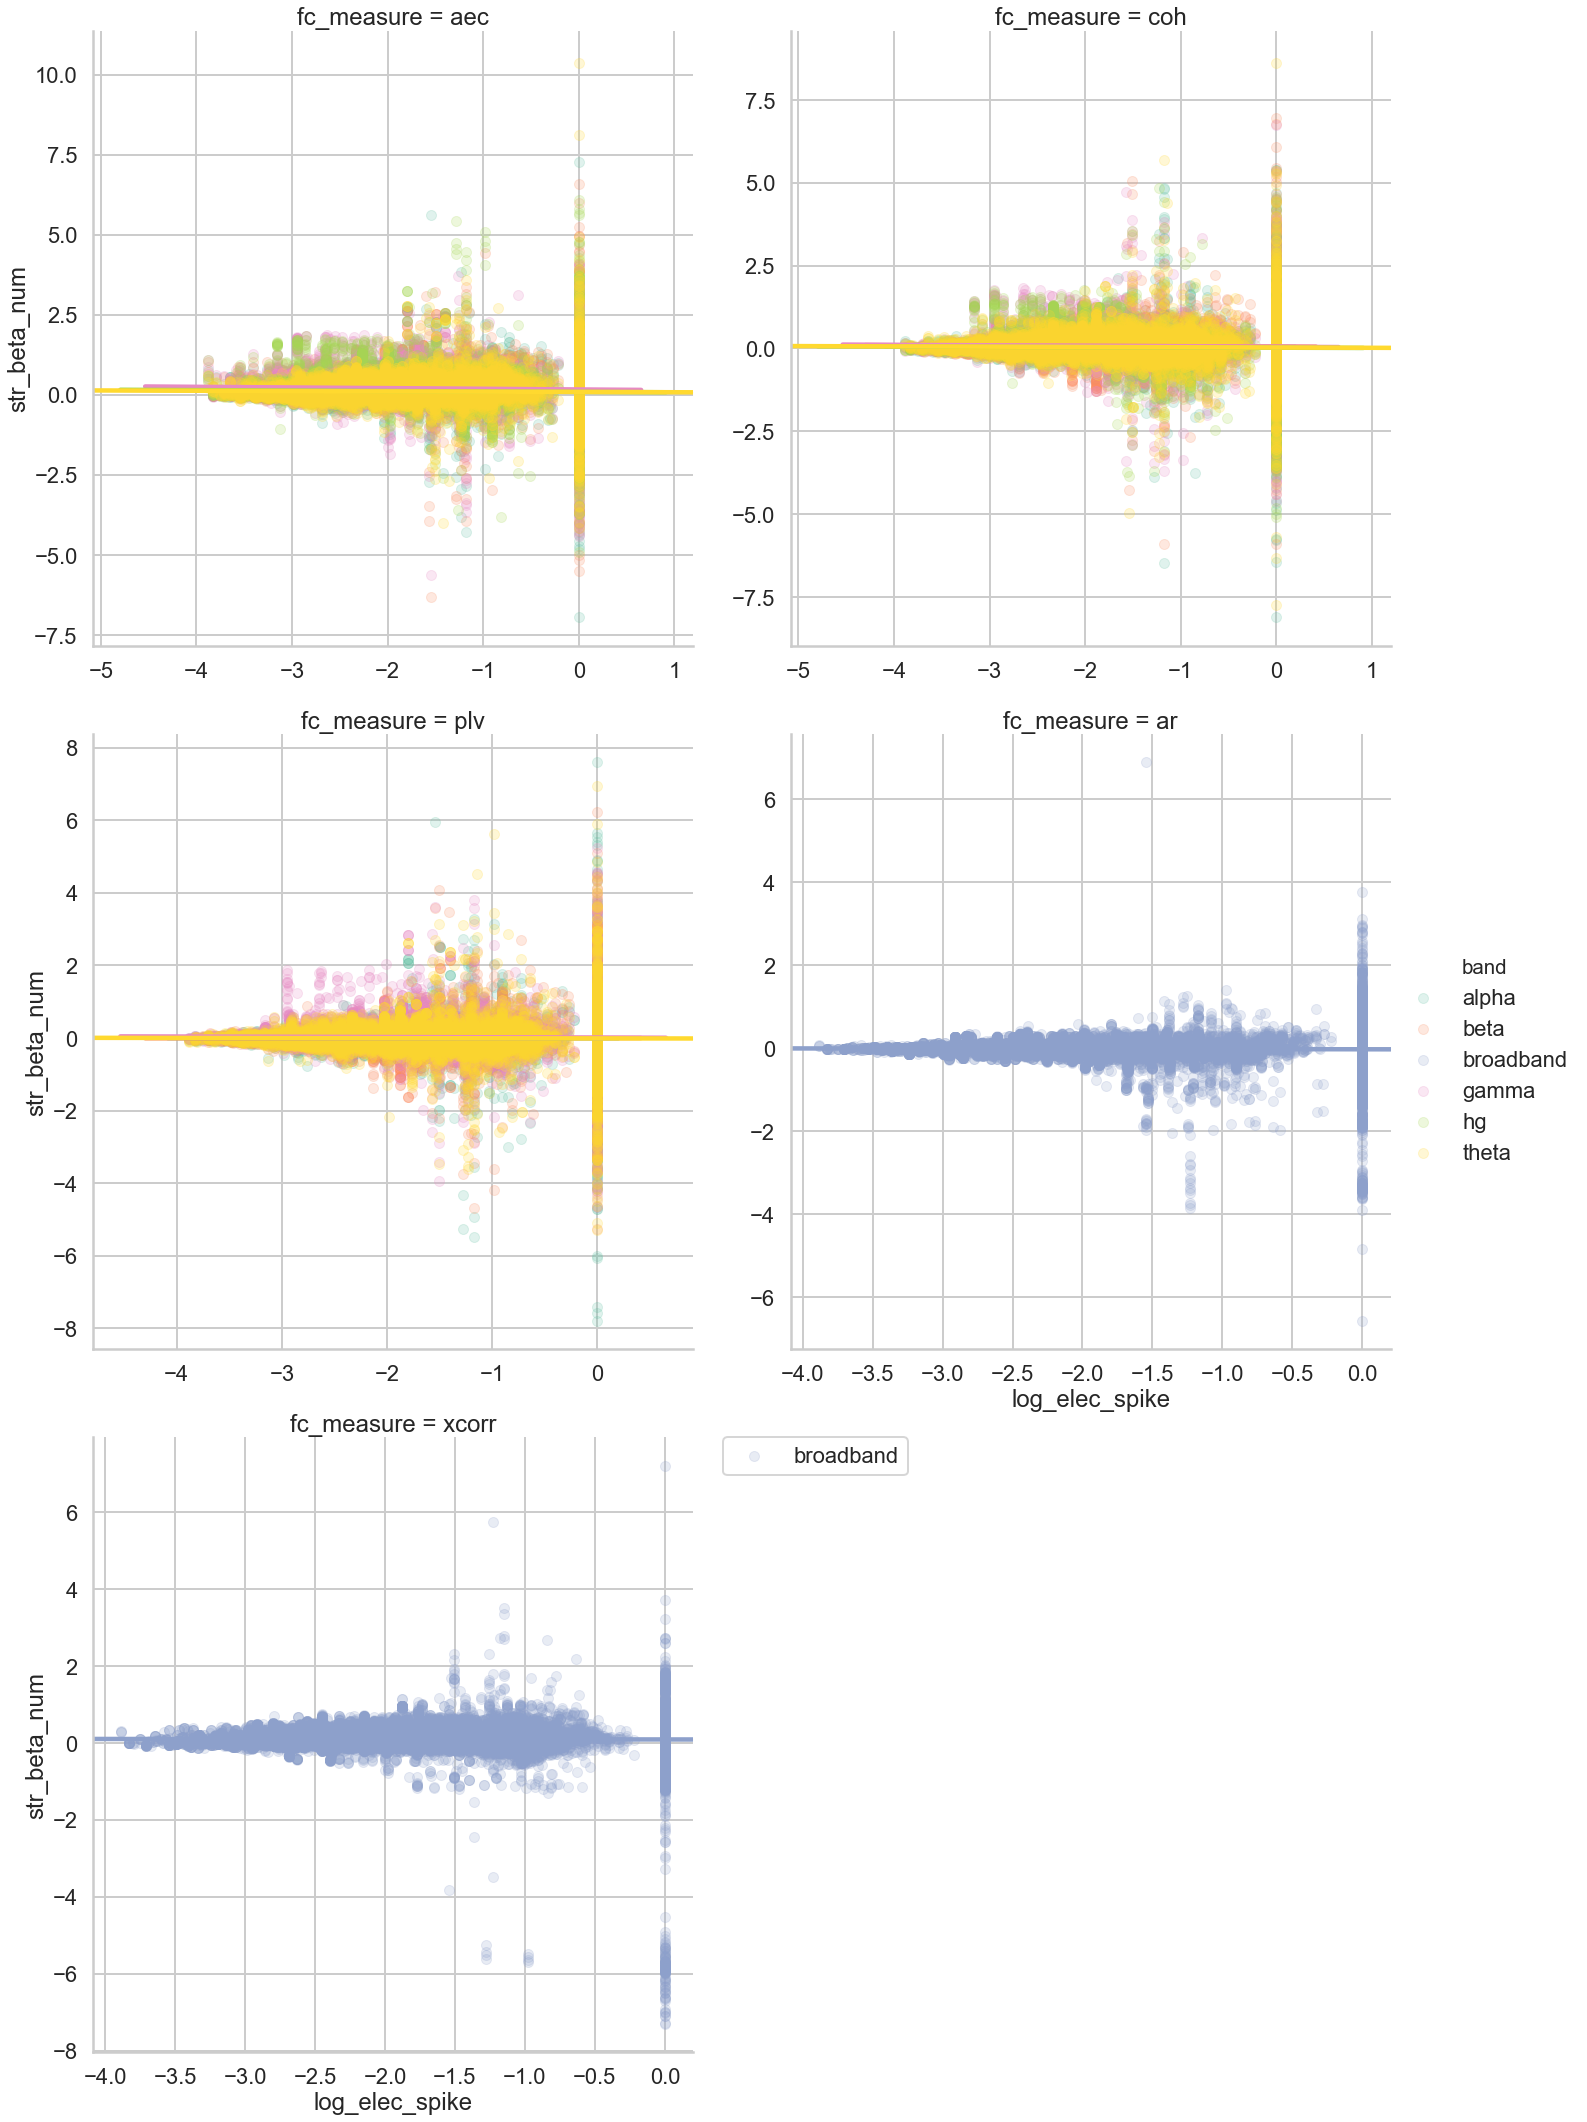

In [227]:
# add log transform
log_spike = np.zeros(np.shape(node_data['elec_spike']))
log_spike[[node_data['elec_spike'] != 0]] = np.log10(node_data['elec_spike'][node_data['elec_spike'] != 0])
node_data['log_elec_spike'] = log_spike

#color pallette
colors = ['#5b6c88', '#f0eee2']
custom_palette = sns.set_palette('Set2')

#plt.figure(figsize=(40,20))
sns.lmplot(data=node_data, x='log_elec_spike', y='str_beta_num', hue='band', col="fc_measure", 
           col_wrap=2, height=10, sharex=False, sharey=False, robust=True, scatter_kws={'s':100, 'alpha':.2})

plt.legend(bbox_to_anchor = (1.05,1), loc=2, borderaxespad=0.)
#for ax in g.axes:
#    ax.set_ylim(-2,2)
    

Total strength

/Users/stiso/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/stiso/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the boxenplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


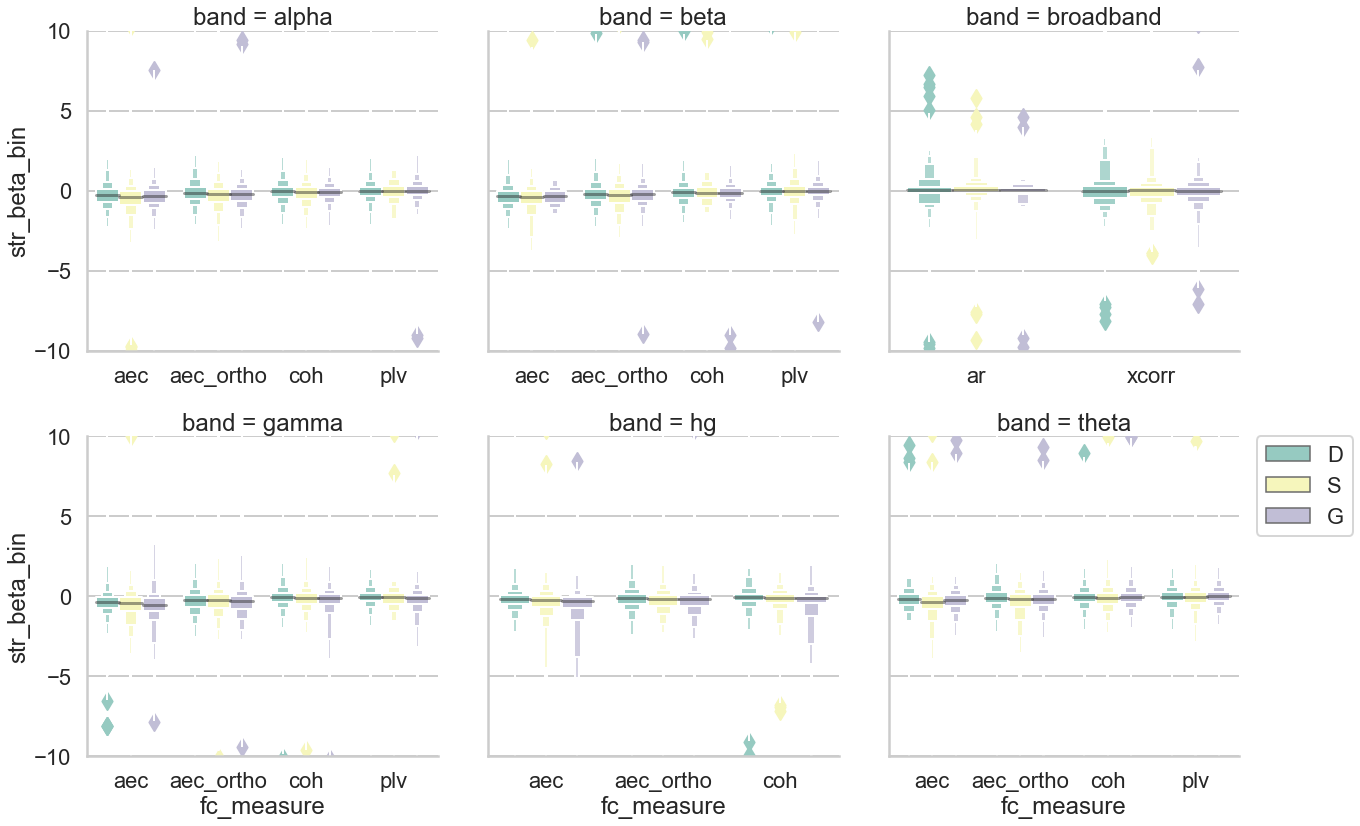

In [32]:
# grand teton natl park color pallette
#colors = ['#a8d0cf', '#babbb1']
custom_palette = sns.set_palette(sns.color_palette(colors))
    
g = sns.FacetGrid(data=node_data, col='band', col_wrap = 3, 
                  sharex=False, legend_out=True, size=6)
g.map(sns.boxenplot, 'fc_measure', 'str_beta_bin', 'type', palette = 'Set3', hue_order = ['D','S','G'])

g.axes[5].legend(bbox_to_anchor = (1.05,1), loc=2, borderaxespad=0.)
for ax in g.axes:
    ax.set_ylim(-10,10)

/Users/stiso/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/stiso/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the boxenplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


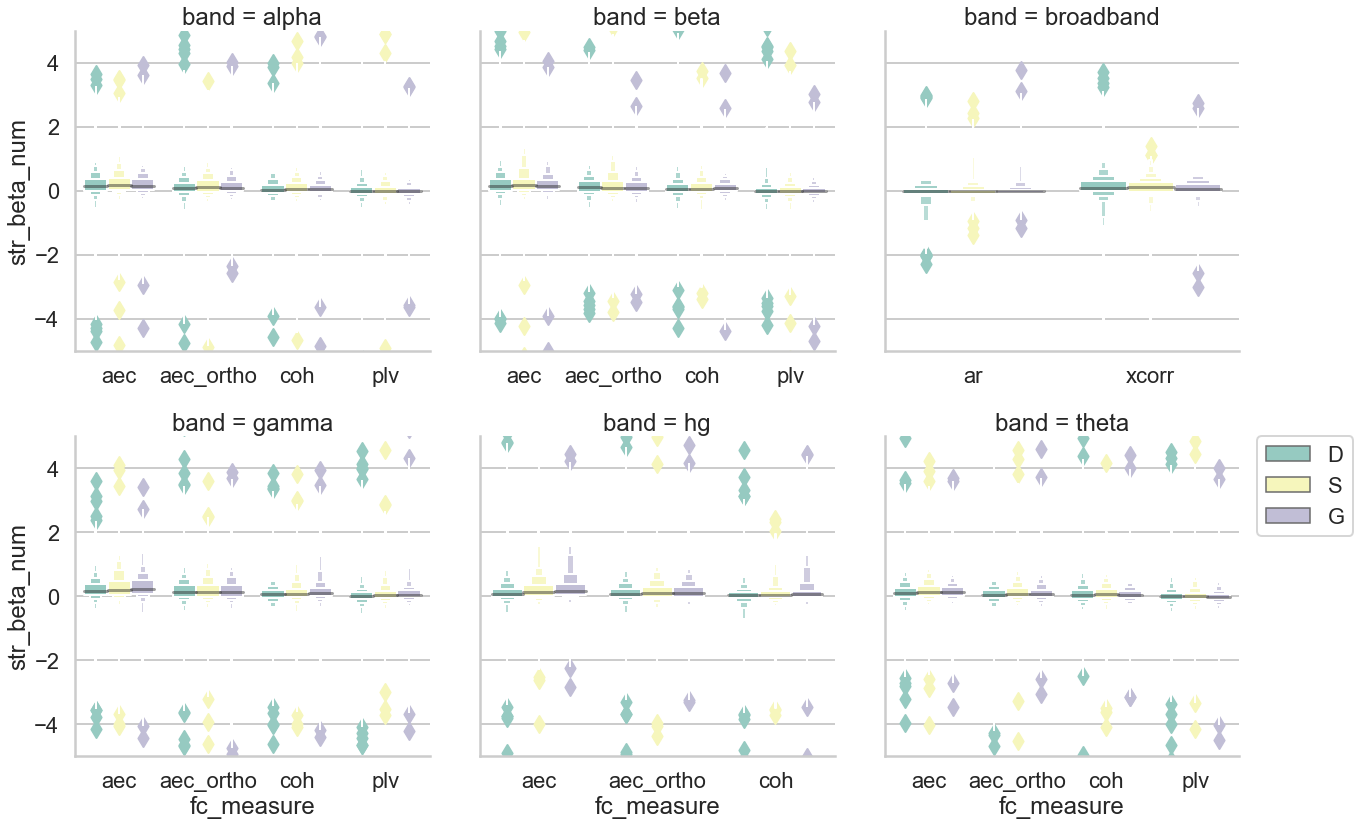

In [33]:
# grand teton natl park color pallette
colors = ['#a8d0cf', '#babbb1']
custom_palette = sns.set_palette(sns.color_palette(colors))
    
g = sns.FacetGrid(data=node_data, col='band', col_wrap = 3, 
                  sharex=False, legend_out=True, size=6)
g.map(sns.boxenplot, 'fc_measure', 'str_beta_num', 'type', palette = 'Set3', hue_order = ['D','S','G'])

g.axes[5].legend(bbox_to_anchor = (1.05,1), loc=2, borderaxespad=0.)
for ax in g.axes:
    ax.set_ylim(-5,5)

/Users/stiso/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/stiso/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the boxenplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


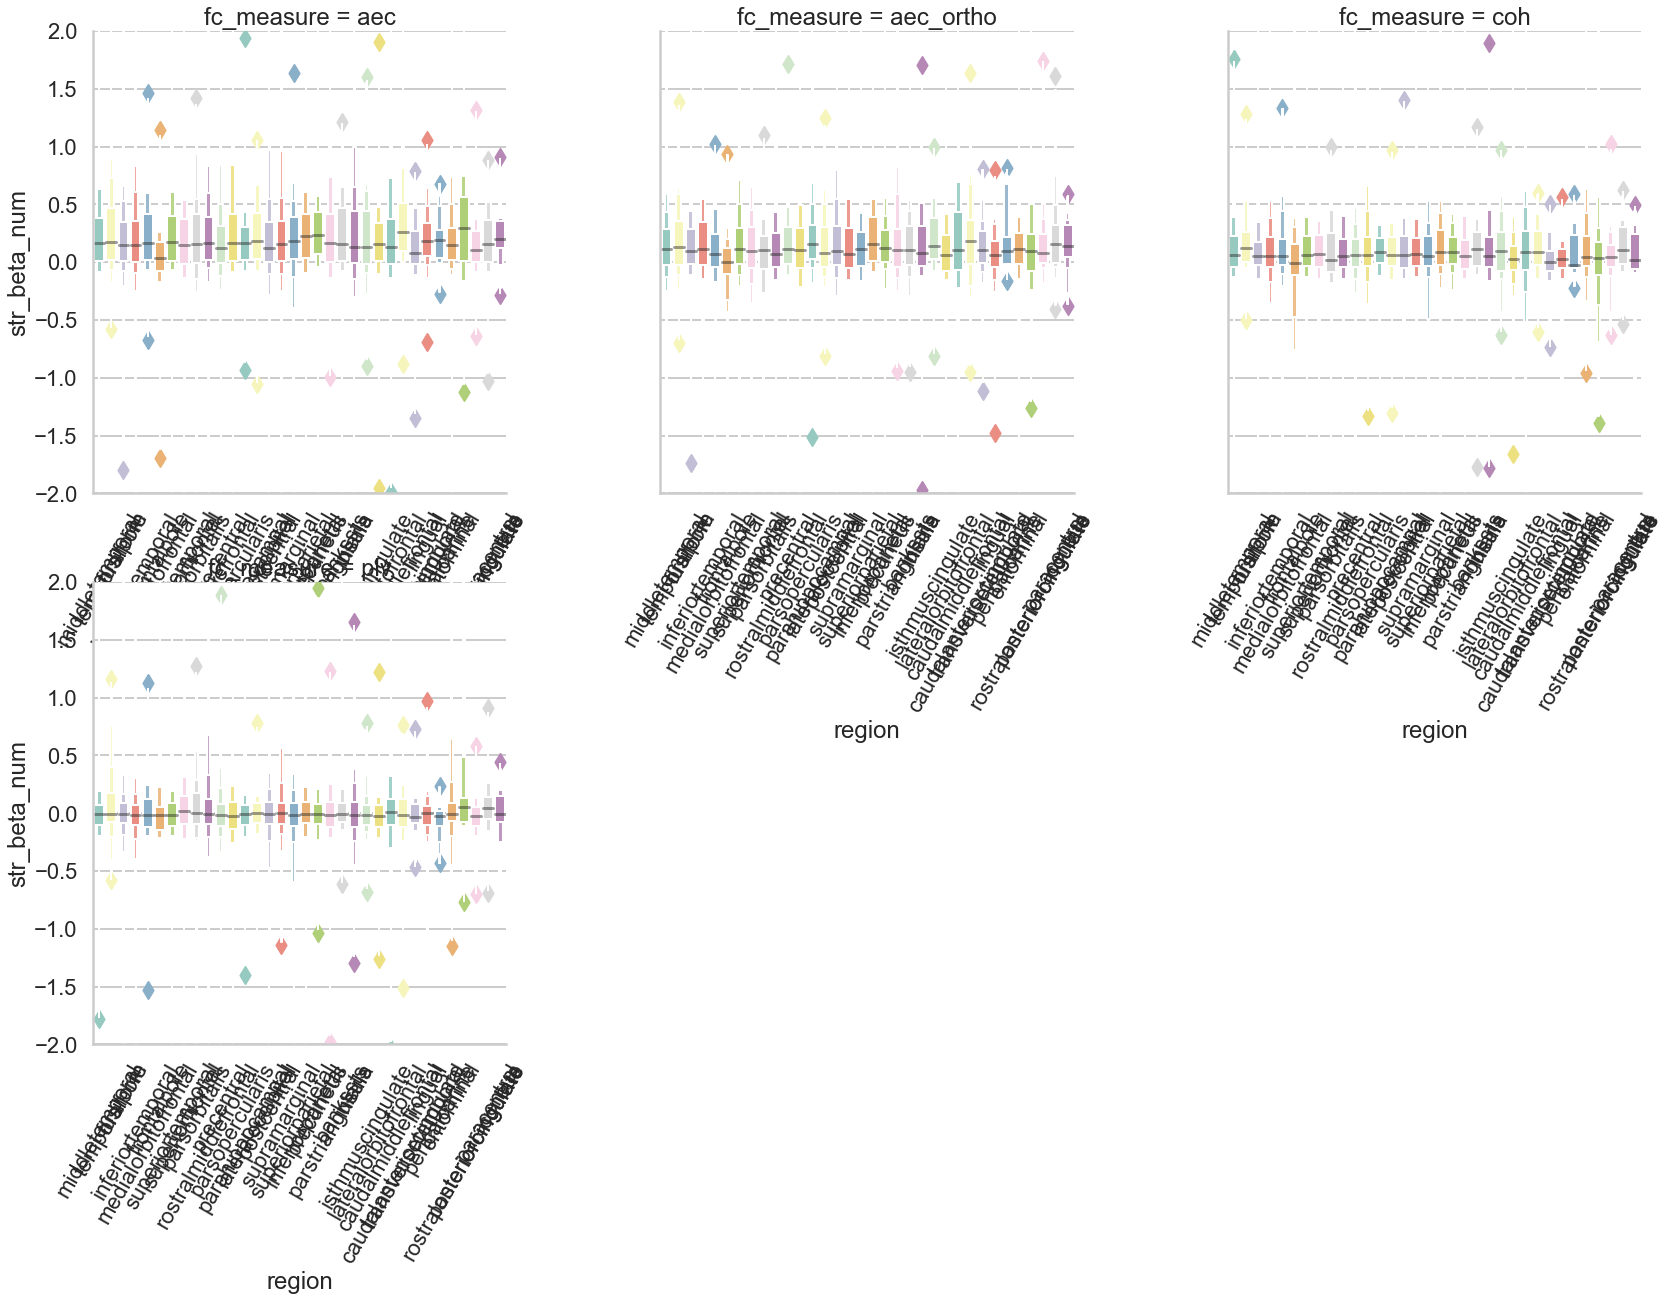

In [35]:
# grand teton natl park color pallette
colors = ['#a8d0cf', '#babbb1']
custom_palette = sns.set_palette(sns.color_palette(colors))
    
g = sns.FacetGrid(data=node_data[node_data['band'] == 'beta'], col='fc_measure', col_wrap = 3, 
                  sharex=False, legend_out=True, size=8)
g.map(sns.boxenplot, 'region', 'str_beta_num', palette = 'Set3')

for ax in g.axes:
    ax.set_ylim(-2,2)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=60)

### Categorize SOZ

In [36]:
temporal = ['lingual', 'bankssts', 'temp', 'hippo', 'rhin', 'fusiform']
frontal = ['front']

In [37]:
# check labels of elecs in soz. Mark as TLE if they contain temporal, 
# and FLE if frontal...for noww. would be better to have clinical 
# labels

epilepsy_type = pd.DataFrame(data={'subj':node_data.subj.unique(), 
                                   'locus':np.empty(node_data.subj.unique().shape)})
for index,row in epilepsy_type.iterrows():
    curr = node_data[node_data['subj'] == row.subj][node_data['elec_in_soz'] == 1]
    tle = [];
    fle = [];
    regions = curr.region.unique()
    for v in regions:
        if type(v) == str:
            tle.append(any([i in v for i in temporal]))
            fle.append(any([i in v for i in frontal]))
    if any(tle) and not any(fle):
        epilepsy_type.loc[index, 'locus'] = 'tle'
    elif any(fle) and not any(tle):
        epilepsy_type.loc[index, 'locus'] = 'fle'
    else:
        epilepsy_type.loc[index,'locus'] = 'amb'
    
epilepsy_type.head()           

/Users/stiso/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


subj locus
0  R1175N   amb
1  R1170J   tle
2  R1166D   amb
3  R1161E   amb
4  R1124J   tle

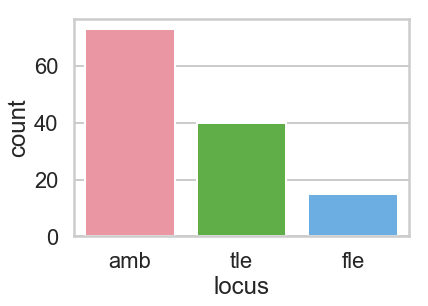

In [38]:
sns.countplot(data=epilepsy_type, x='locus')

In [39]:
# add locus back to big data frames
net_data = pd.merge(net_data, epilepsy_type, on='subj')
node_data = pd.merge(node_data, epilepsy_type, on='subj')
net_data.head()

band_measure  n_tp  str_beta_bin  str_beta_num  str_soz_beta_bin  \
0        alpha_aec   430     -0.381462      0.475069         -0.479936   
1  alpha_aec_ortho   430     -0.232843      0.414085         -0.200678   
2        alpha_coh   430     -0.377510      0.441747         -0.368589   
3        alpha_plv   430     -0.456733      0.413028         -0.517453   
4         beta_aec   430     -0.591918      0.545076         -0.733584   

   str_soz_beta_num  str_not_soz_beta_num  str_spike_beta_num  \
0          0.474653              0.475251            0.471236   
1          0.412866              0.408954            0.308307   
2          0.476458              0.434604            0.312499   
3          0.434959              0.400411            0.288097   
4          0.613832              0.545029            0.516449   

   str_not_soz_beta_bin  str_spike_beta_bin  str_not_spike_beta_bin  \
0             -0.377808           -0.375538               -0.387141   
1             -0.232903           -0.027842               -0.272014   
2             -0.370379           -0.173272               -0.410711   
3             -0.440434           -0.282706               -0.482510   
4             -0.589184           -0.499192               -0.610455   

  fc_measure  str_not_spike_beta_num   band    subj hand   age gender  race  \
0        aec                0.480301  alpha  R1175N    R  34.0      M   1.0   
1  aec_ortho                0.436273  alpha  R1175N    R  34.0      M   1.0   
2        coh                0.459005  alpha  R1175N    R  34.0      M   1.0   
3        plv                0.429426  alpha  R1175N    R  34.0      M   1.0   
4        aec                0.553404   beta  R1175N    R  34.0      M   1.0   

  locus  
0   amb  
1   amb  
2   amb  
3   amb  
4   amb

In [40]:
node_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 288876 entries, 0 to 288875
Data columns (total 29 columns):
elec                      288876 non-null object
band_measure              288876 non-null object
n_tp                      288876 non-null int64
elec_spike                288876 non-null float64
elec_in_soz               288876 non-null int64
str_soz_beta_bin          191751 non-null float64
str_not_soz_beta_bin      177069 non-null float64
str_spike_beta_bin        173838 non-null float64
str_not_spike_beta_bin    155270 non-null float64
str_beta_bin              280917 non-null float64
str_soz_beta_num          191751 non-null float64
str_not_soz_beta_num      177069 non-null float64
str_spike_beta_num        173838 non-null float64
str_beta_num              280917 non-null float64
str_not_spike_beta_num    155270 non-null float64
fc_measure                288876 non-null object
band                      288876 non-null object
region                    259056 non-null objec

## Net plots with category by locus

/Users/stiso/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the boxenplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


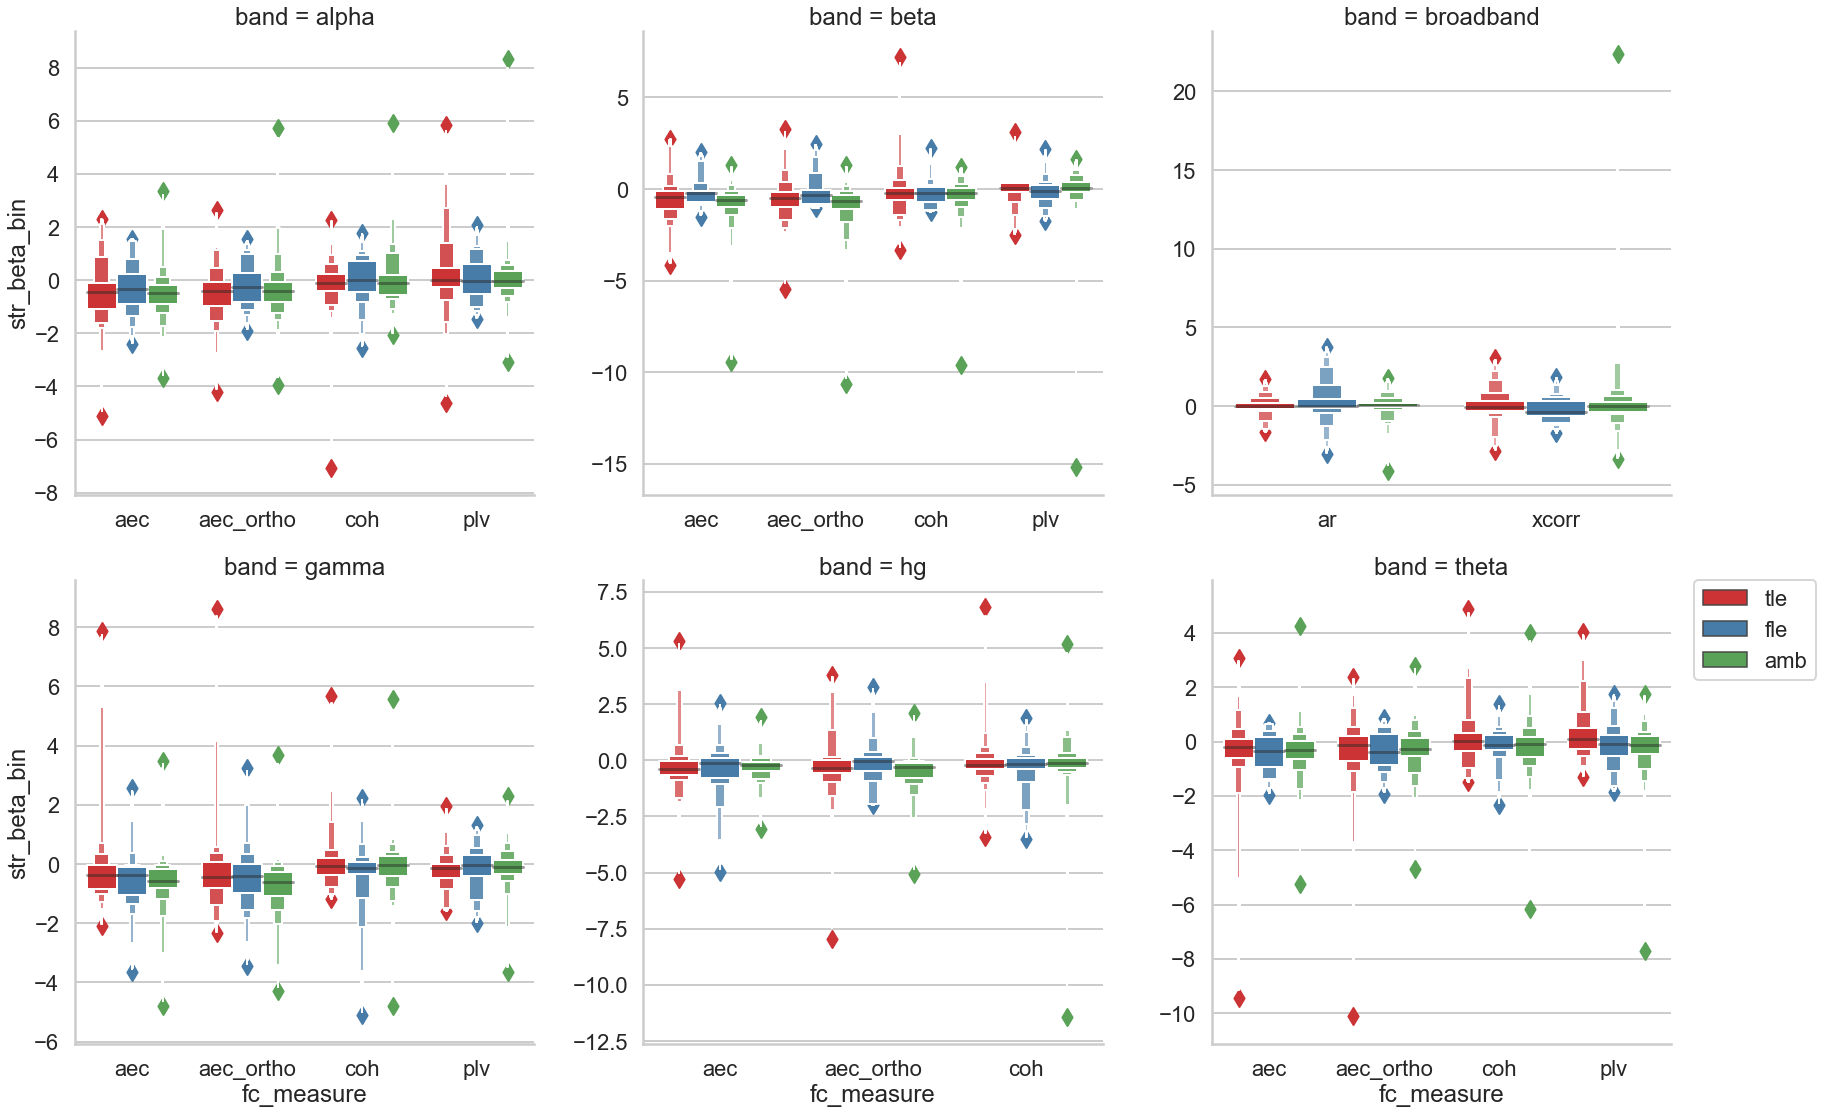

In [42]:
# grand teton palette
colors = ['#a8d0cf', '#babbb1']
custom_palette = sns.set_palette(sns.color_palette(colors))

g = sns.FacetGrid(data=net_data, col='Frequency Band' ,col_wrap = 3, 
                  sharex=False, sharey=False, legend_out=True, height=8)
g.map(sns.boxenplot, 'Measure', 'str_beta_bin', 'locus', palette = "Set1", hue_order = ['tle','fle','amb'])
#g.map(sns.stripplot, 'fc_measure', 'str_beta_bin', 'locus', hue_order = ['tle','fle','amb'],jitter=True, dodge=True,
#              alpha=.2, zorder=1, size=6)
g.axes[5].legend(bbox_to_anchor = (1.05,1), loc=2, borderaxespad=0.)
#for ax in g.axes:
#    ax.set_ylim(-5,5)
    


/Users/stiso/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the boxenplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


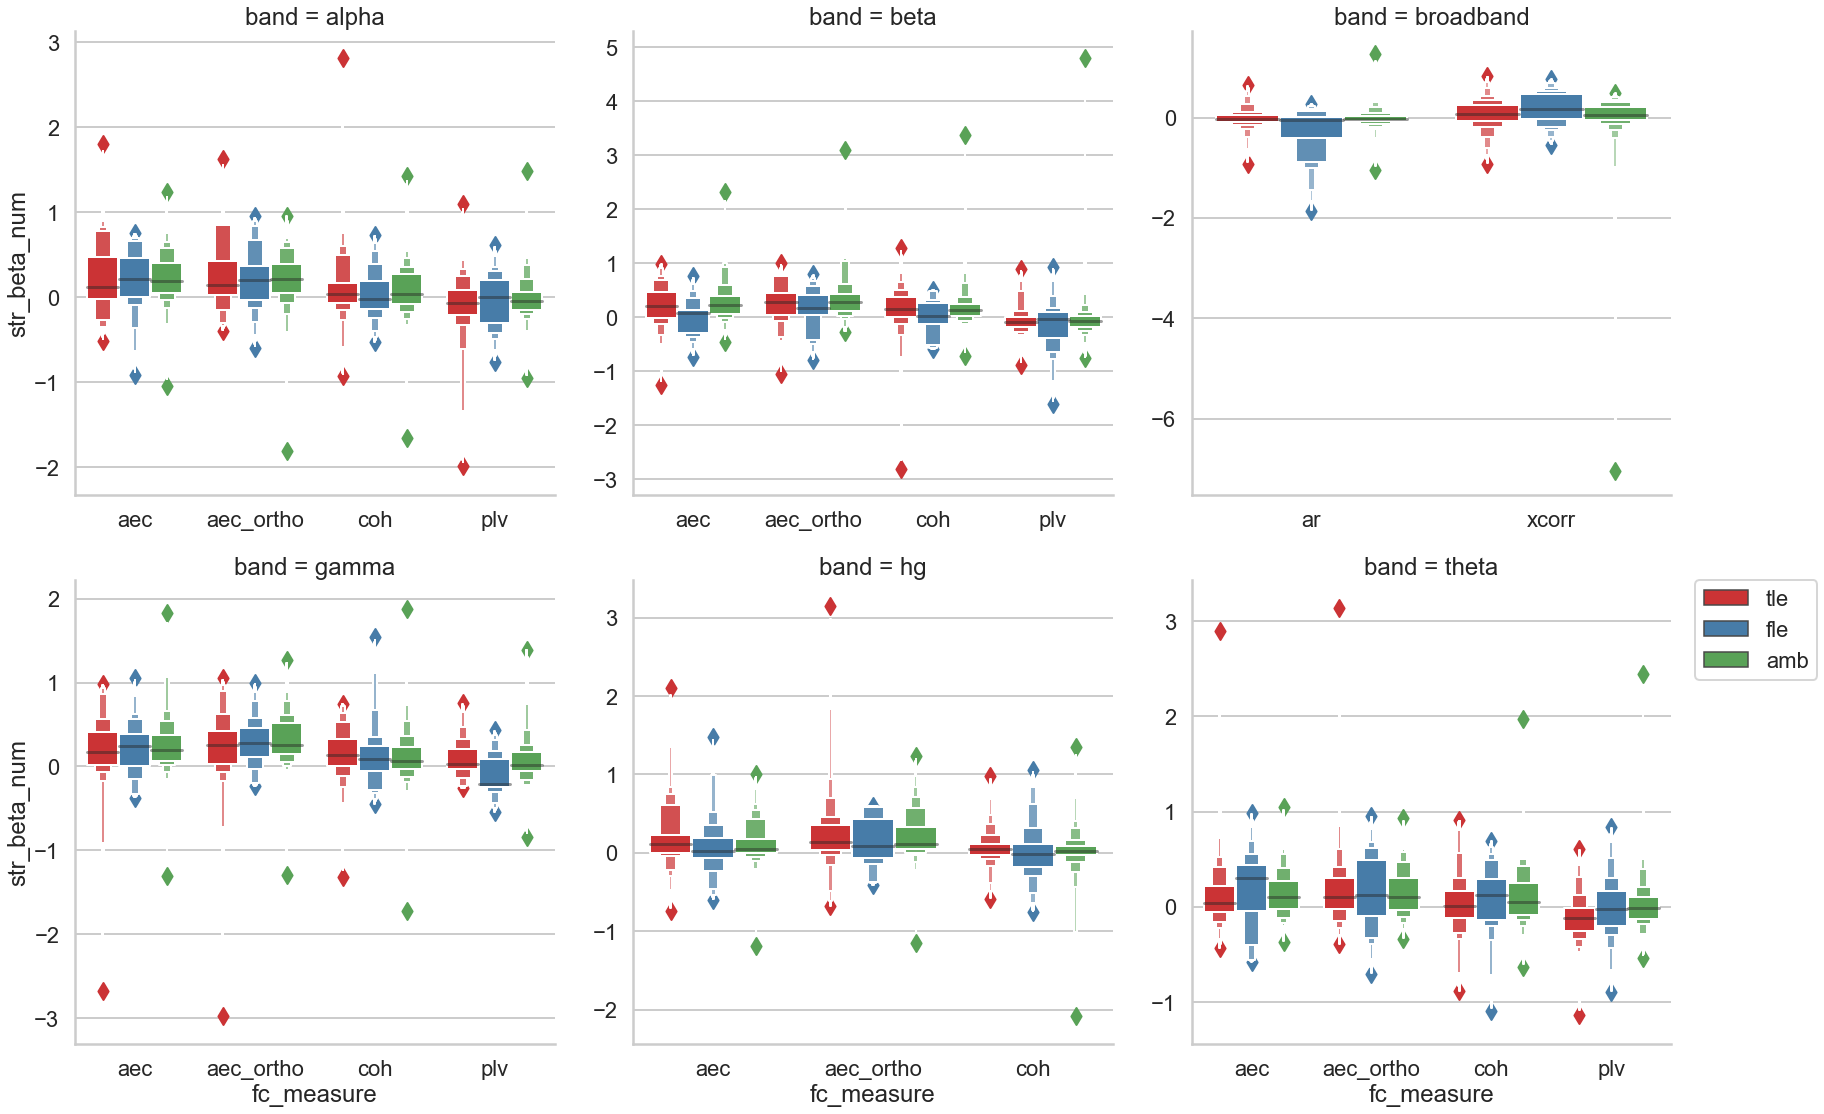

In [43]:
g = sns.FacetGrid(data=net_data, col='Frequency Band' ,col_wrap = 3, 
                  sharex=False, sharey=False, legend_out=True, height=8)
g.map(sns.boxenplot, 'Measure', 'str_beta_num', 'locus', palette = "Set1", hue_order = ['tle','fle','amb'])
g.axes[5].legend(bbox_to_anchor = (1.05,1), loc=2, borderaxespad=0.)
#for ax in g.axes:
#    ax.set_ylim(-2,2)
    
#g.savefig("../img/net_num.eps")

## Behavior

In [179]:
task_data = pd.read_csv(f'{RAM_dir}group_analysis/task_performance.csv', index_col=0)
task_data.reset_index(inplace=True)
task_data.head(10)

subj        YC  TH       PAL  catFR        FR
0  R1001P  0.345526 NaN  0.041370    NaN  0.546573
1  R1002P       NaN NaN  0.492335    NaN  0.945857
2  R1003P       NaN NaN  0.083711    NaN  0.602817
3  R1004D       NaN NaN       NaN  0.625       NaN
4  R1006P  0.401778 NaN       NaN    NaN  0.779412
5  R1008J  0.530724 NaN       NaN    NaN       NaN
6  R1009W  0.183700 NaN       NaN    NaN       NaN
7  R1010J  0.358207 NaN       NaN    NaN  0.825373
8  R1013E  0.182021 NaN       NaN    NaN       NaN
9  R1014D  0.354468 NaN       NaN    NaN       NaN

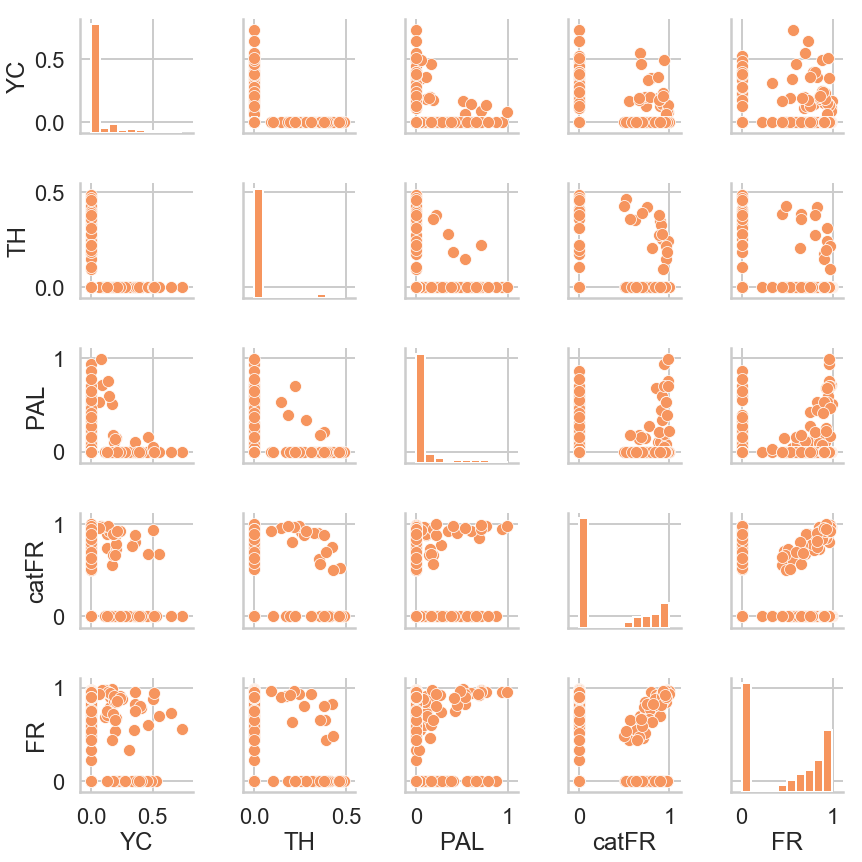

In [180]:
sns.pairplot(data=task_data.fillna(0), vars=['YC','TH','PAL','catFR','FR'])

In [181]:
# add averages over recal and nav tasks
task_data = task_data.assign(recall = task_data[['catFR','FR','PAL']].mean(axis=1, skipna=True))
task_data = task_data.assign(nav = task_data[['TH','YC']].mean(axis=1, skipna=True))
task_data = task_data.assign(avg = task_data[['nav','recall']].mean(axis=1, skipna=True))
task_data.head()

subj        YC  TH       PAL  catFR        FR    recall       nav  \
0  R1001P  0.345526 NaN  0.041370    NaN  0.546573  0.293972  0.345526   
1  R1002P       NaN NaN  0.492335    NaN  0.945857  0.719096       NaN   
2  R1003P       NaN NaN  0.083711    NaN  0.602817  0.343264       NaN   
3  R1004D       NaN NaN       NaN  0.625       NaN  0.625000       NaN   
4  R1006P  0.401778 NaN       NaN    NaN  0.779412  0.779412  0.401778   

        avg  
0  0.319749  
1  0.719096  
2  0.343264  
3  0.625000  
4  0.590595

In [182]:
# merge with net_data
subj_idx = [x in net_data.subj.unique() for x in task_data.subj]
task_data = task_data[subj_idx]
net_task_data = pd.merge(net_data, task_data, on=['subj'])
net_task_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4704 entries, 0 to 4703
Data columns (total 27 columns):
band_measure              4704 non-null object
n_tp                      4704 non-null int64
str_beta_bin              4641 non-null float64
str_beta_num              4641 non-null float64
str_soz_beta_bin          3255 non-null float64
str_soz_beta_num          3255 non-null float64
str_not_soz_beta_num      3243 non-null float64
str_spike_beta_num        2940 non-null float64
str_not_soz_beta_bin      3243 non-null float64
str_spike_beta_bin        2940 non-null float64
str_not_spike_beta_bin    2928 non-null float64
Measure                   4704 non-null object
str_not_spike_beta_num    2928 non-null float64
Frequency Band            4704 non-null object
subj                      4704 non-null object
hand                      4704 non-null object
age                       4704 non-null float64
gender                    4704 non-null object
race                      4704 non-nu

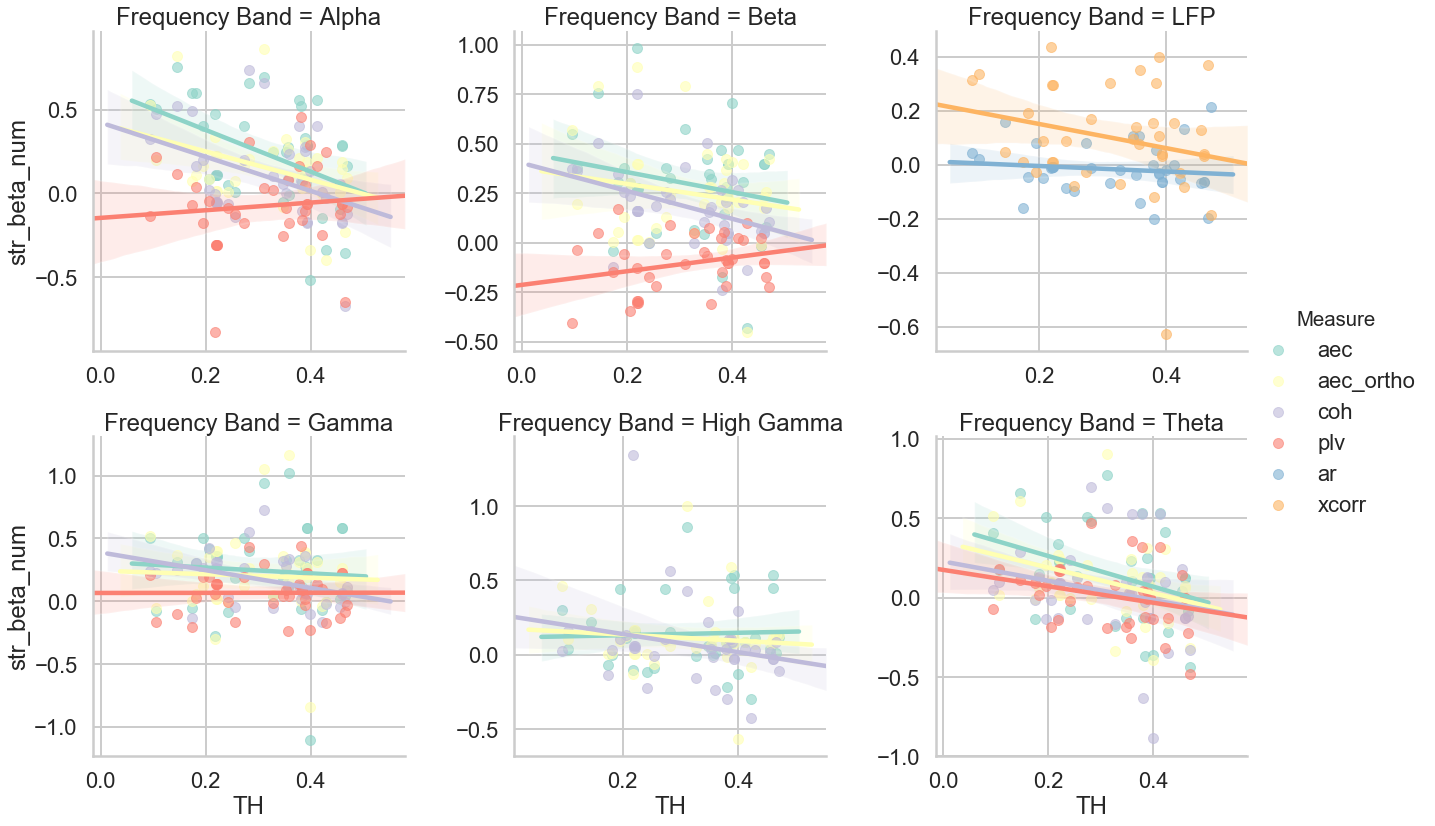

In [185]:
sns.lmplot(data=net_task_data, x='TH', y='str_beta_num', hue='Measure', col="Frequency Band", 
           col_wrap=3, height=6, sharex=False, sharey=False, palette='Set3', scatter_kws={'s':100, 'alpha':.6})

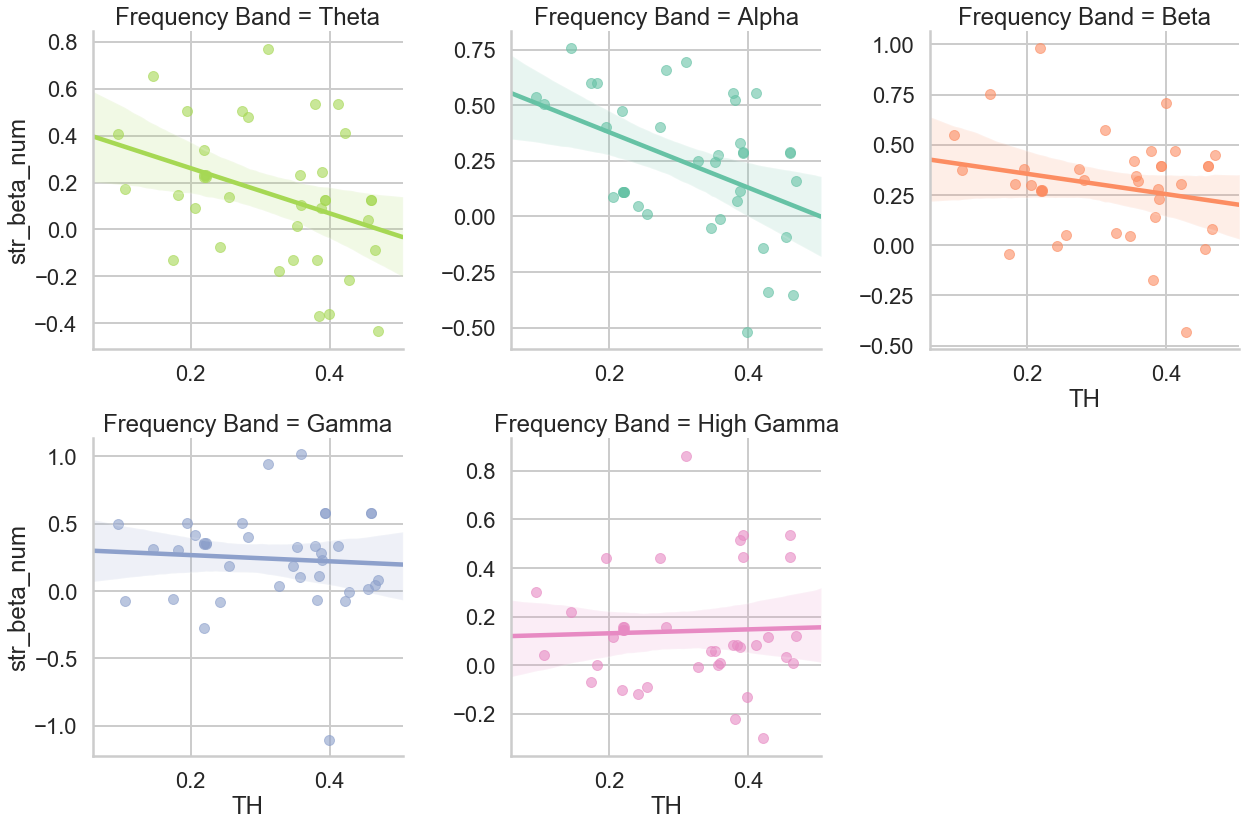

In [189]:
sns.lmplot(data=net_task_data[net_task_data['Measure'] == 'aec'], x='TH', y='str_beta_num', hue='Frequency Band', col="Frequency Band", 
           col_wrap=3, height=6, sharex=False, sharey=False, palette='Set2', scatter_kws={'s':100, 'alpha':.6}, col_order=['Theta','Alpha','Beta','Gamma','High Gamma'])
plt.savefig(f"../img/task_perf_band{detector}.eps")

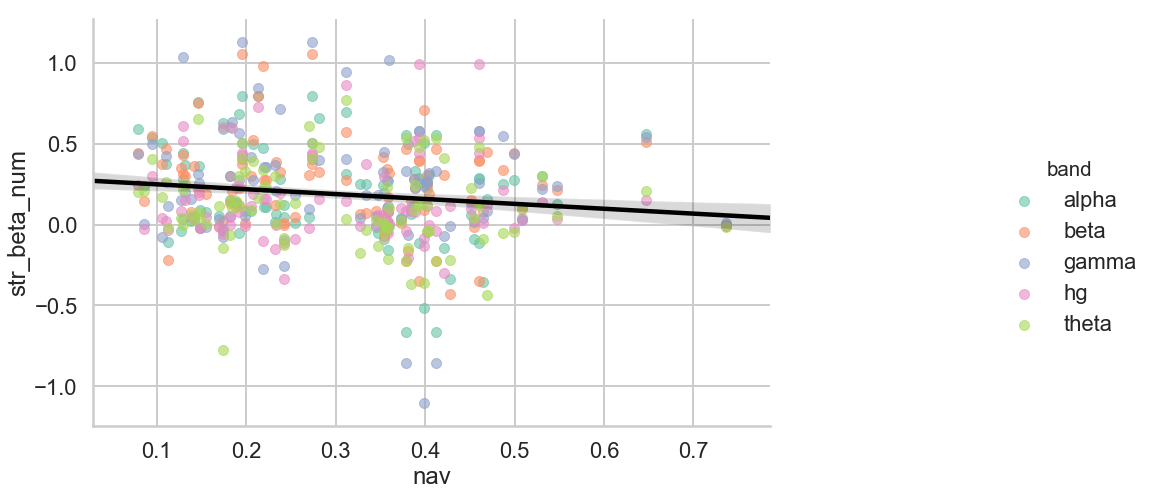

In [32]:
g = sns.lmplot(data=net_task_data[net_task_data['Measure'] == 'aec'], x='nav', y='str_beta_num', hue='Frequency Band', fit_reg=False,
           height=6, sharex=False, sharey=False, palette='Set2', scatter_kws={'s':100, 'alpha':.6})
sns.regplot(data=net_task_data[net_task_data['Measure'] == 'aec'], x='nav', y='str_beta_num', scatter=False, ax=g.axes[0,0], color='black')
g.fig.set_figwidth(20)
g.fig.set_figheight(8)
plt.savefig(f"../img/task_perf_band{detector}.eps")

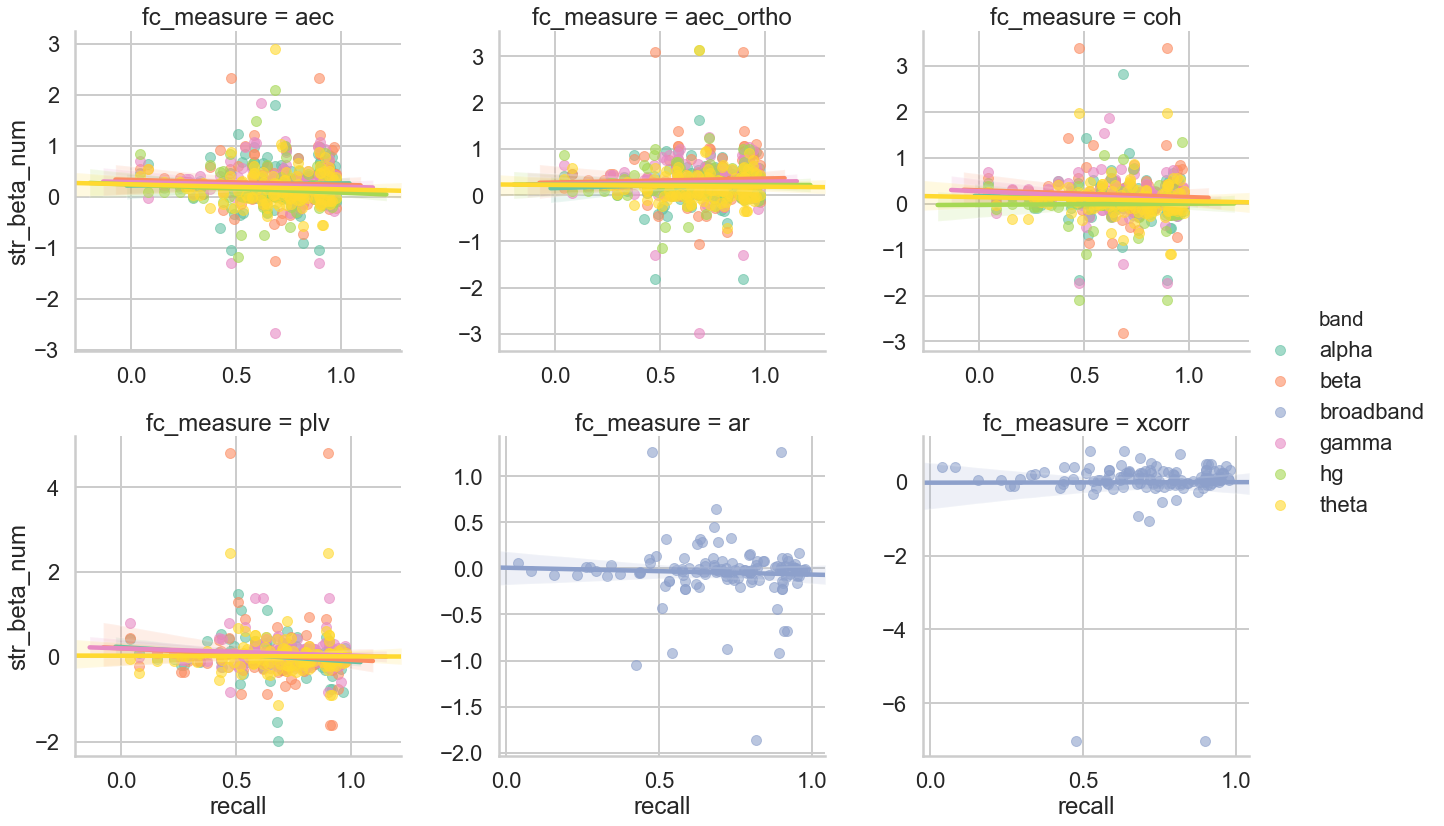

In [51]:
sns.lmplot(data=net_task_data, x='recall', y='str_beta_num', hue='Frequency Band', col="Measure", 
           col_wrap=3, height=6, sharex=False, sharey=False, palette='Set2', scatter_kws={'s':100, 'alpha':.6})

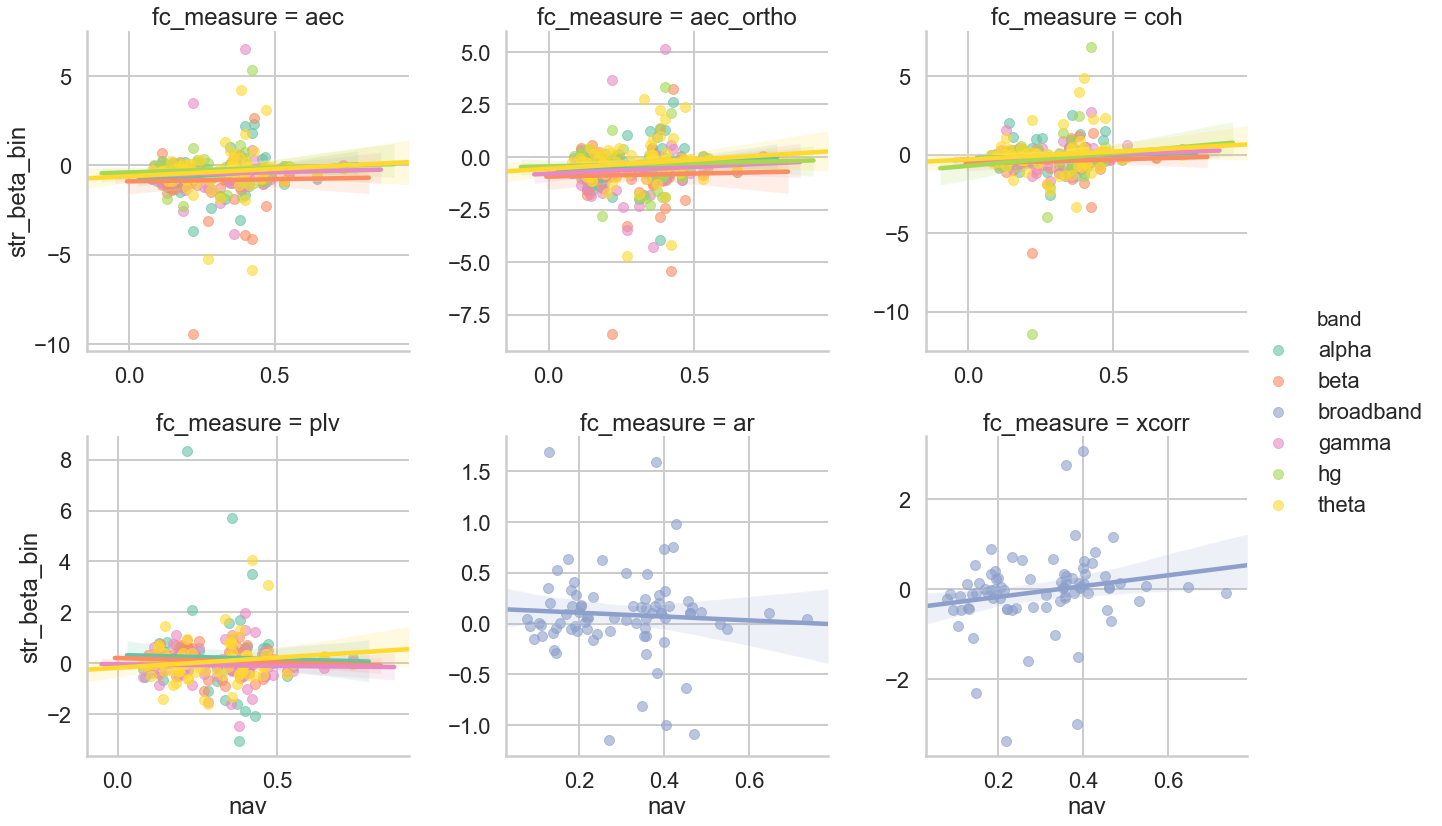

In [52]:
sns.lmplot(data=net_task_data, x='nav', y='str_beta_bin', hue='Frequency Band', col="Measure", 
           col_wrap=3, height=6, sharex=False, sharey=False, palette='Set2', scatter_kws={'s':100, 'alpha':.6})

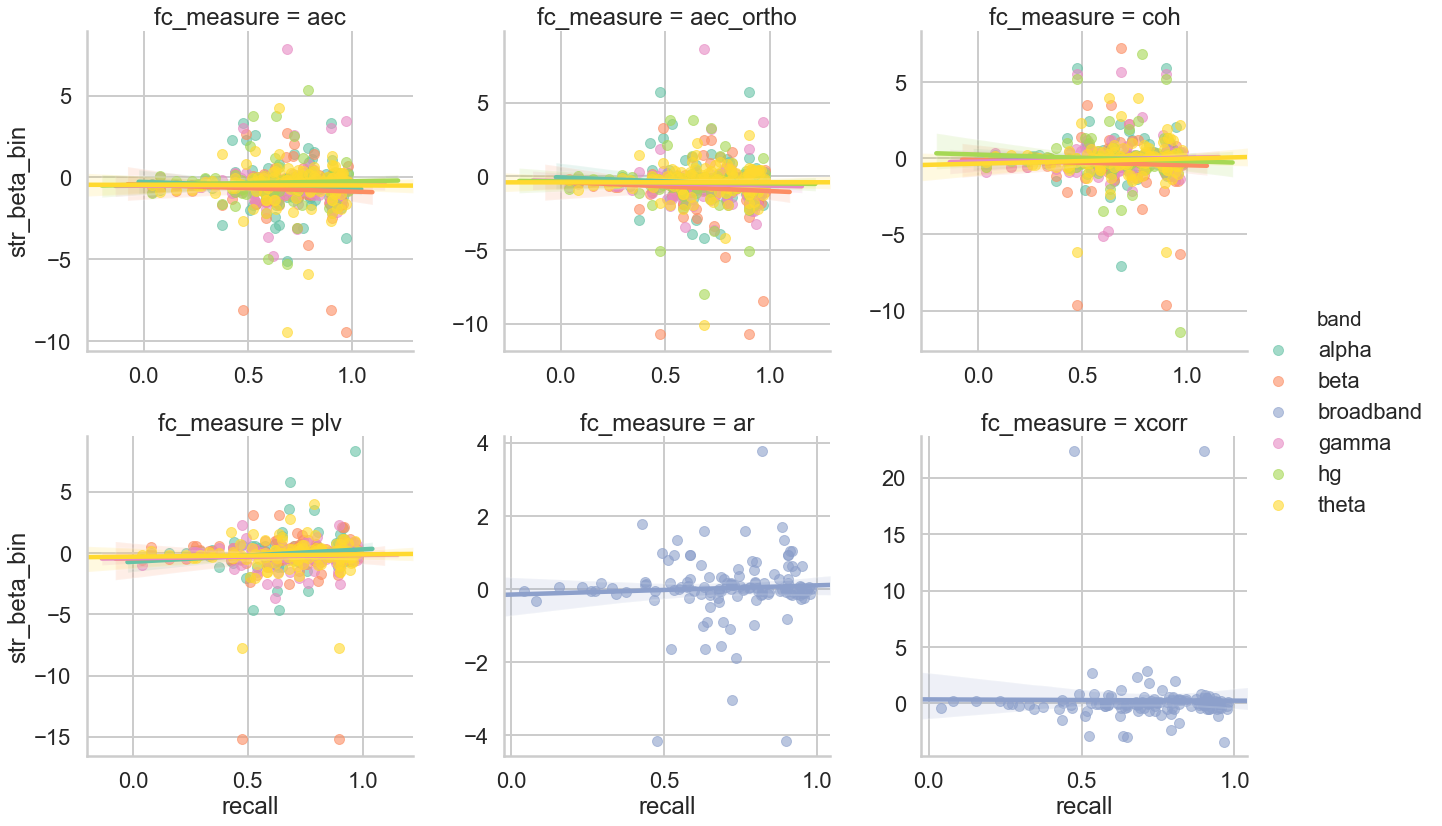

In [53]:
sns.lmplot(data=net_task_data, x='recall', y='str_beta_bin', hue='band', col="fc_measure", 
           col_wrap=3, height=6, sharex=False, sharey=False, palette='Set2', scatter_kws={'s':100, 'alpha':.6})

In [183]:
# save
net_task_data.to_csv(f'{RAM_dir}group_analysis/win_{win}/net_task_data_clean{detector}.csv')

Other parameters

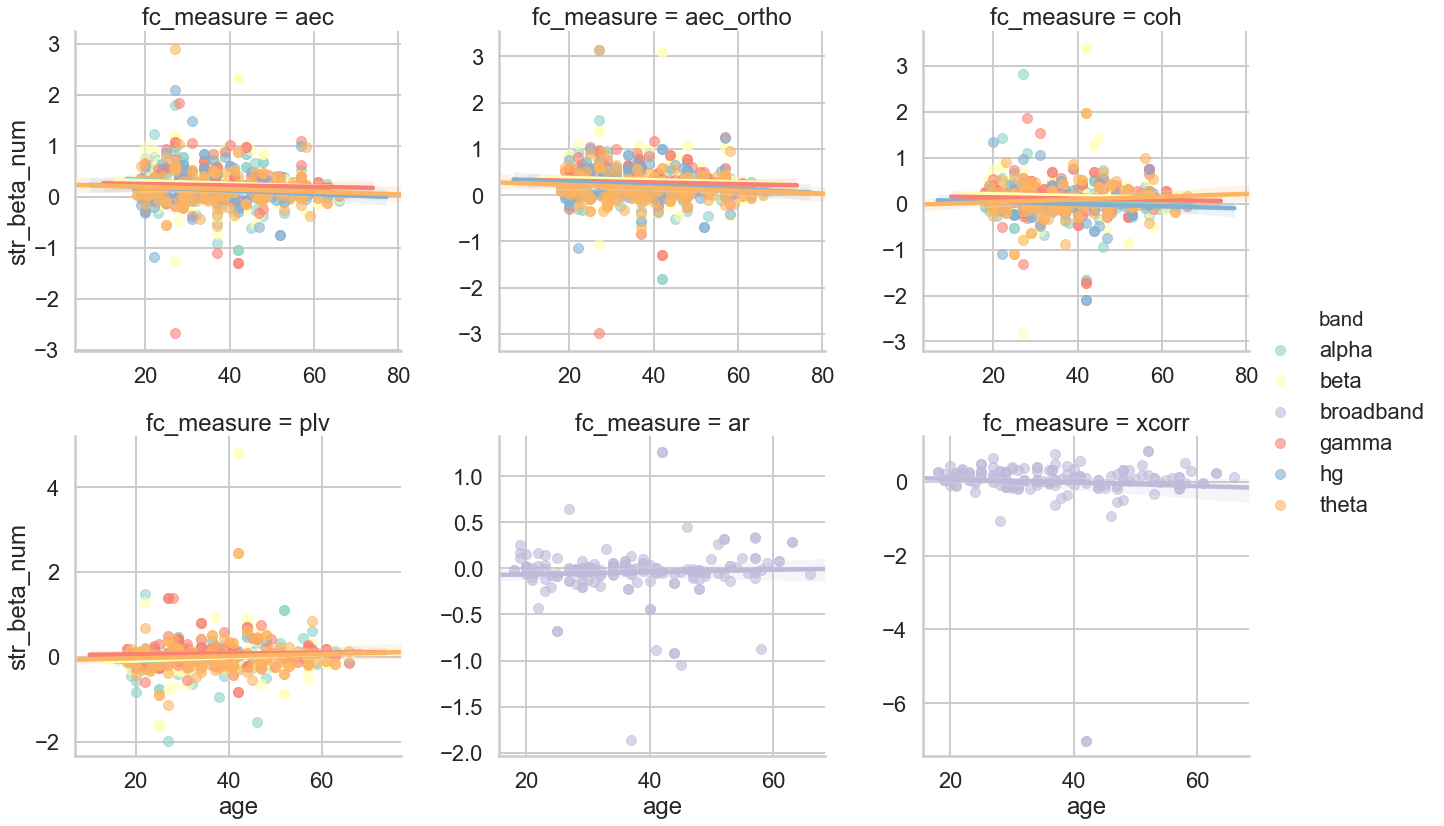

In [55]:
sns.lmplot(data=net_task_data, x='age', y='str_beta_num', hue='Frequency Band', col="Measure", 
           col_wrap=3, height=6, sharex=False, sharey=False, palette='Set3', scatter_kws={'s':100, 'alpha':.6})

/Users/stiso/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the boxenplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


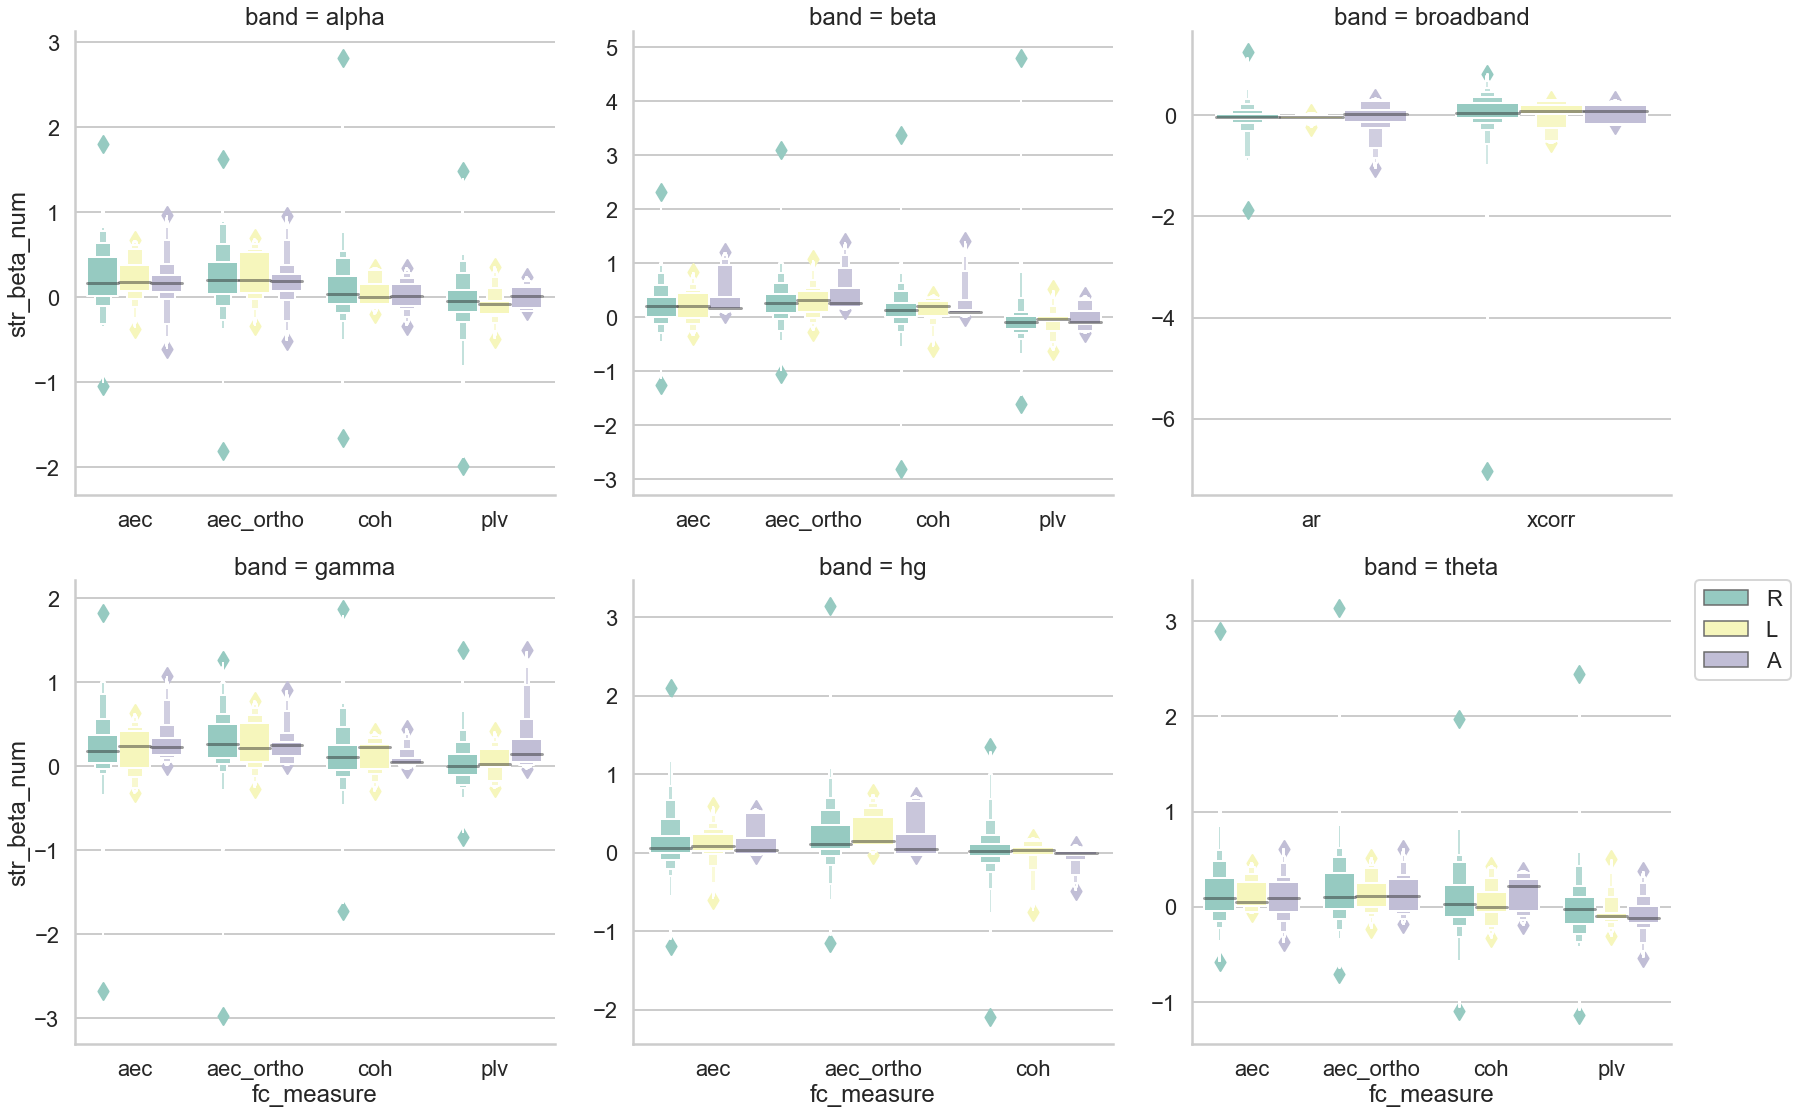

In [56]:
g = sns.FacetGrid(data=net_data, col='Frequency Band' ,col_wrap = 3, 
                  sharex=False, sharey=False, legend_out=True, height=8)
g.map(sns.boxenplot, 'Measure', 'str_beta_num', 'hand', palette = "Set3", hue_order=['R','L', 'A'])
#g.map(sns.stripplot, 'fc_measure', 'spike_beta_num', 'spike',jitter=True, dodge=True,
#              alpha=.2, zorder=1, size=6, hue_order=['str_spike_beta_num','str_not_spike_beta_num'])
# g.axes[0].set_xticklabels(g.axes[0].xaxis.get_majorticklabels(),rotation=30)
# g.axes[1].set_xticklabels(g.axes[1].xaxis.get_majorticklabels(),rotation=30)
# g.axes[2].set_xticklabels(g.axes[2].xaxis.get_majorticklabels(),rotation=30)
g.axes[5].legend(bbox_to_anchor = (1.05,1), loc=2, borderaxespad=0.)